# Exploratory Data Analysis of Text Data

#### Dataset used: https://www.kaggle.com/bittlingmayer/amazonreviews

In [49]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [14]:
data = pd.read_csv('../data/Zindi_Tech4MentalHealth/Train.csv')

In [15]:
data.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [18]:
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head()

,ID,text,label,sentiment
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,0.6500
1,9JDAGUV3,Why do I get hallucinations?,Drugs,0.0000
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,-0.0625
3,6UY7DX6Q,Why is life important?,Suicide,0.4000
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,0.0000


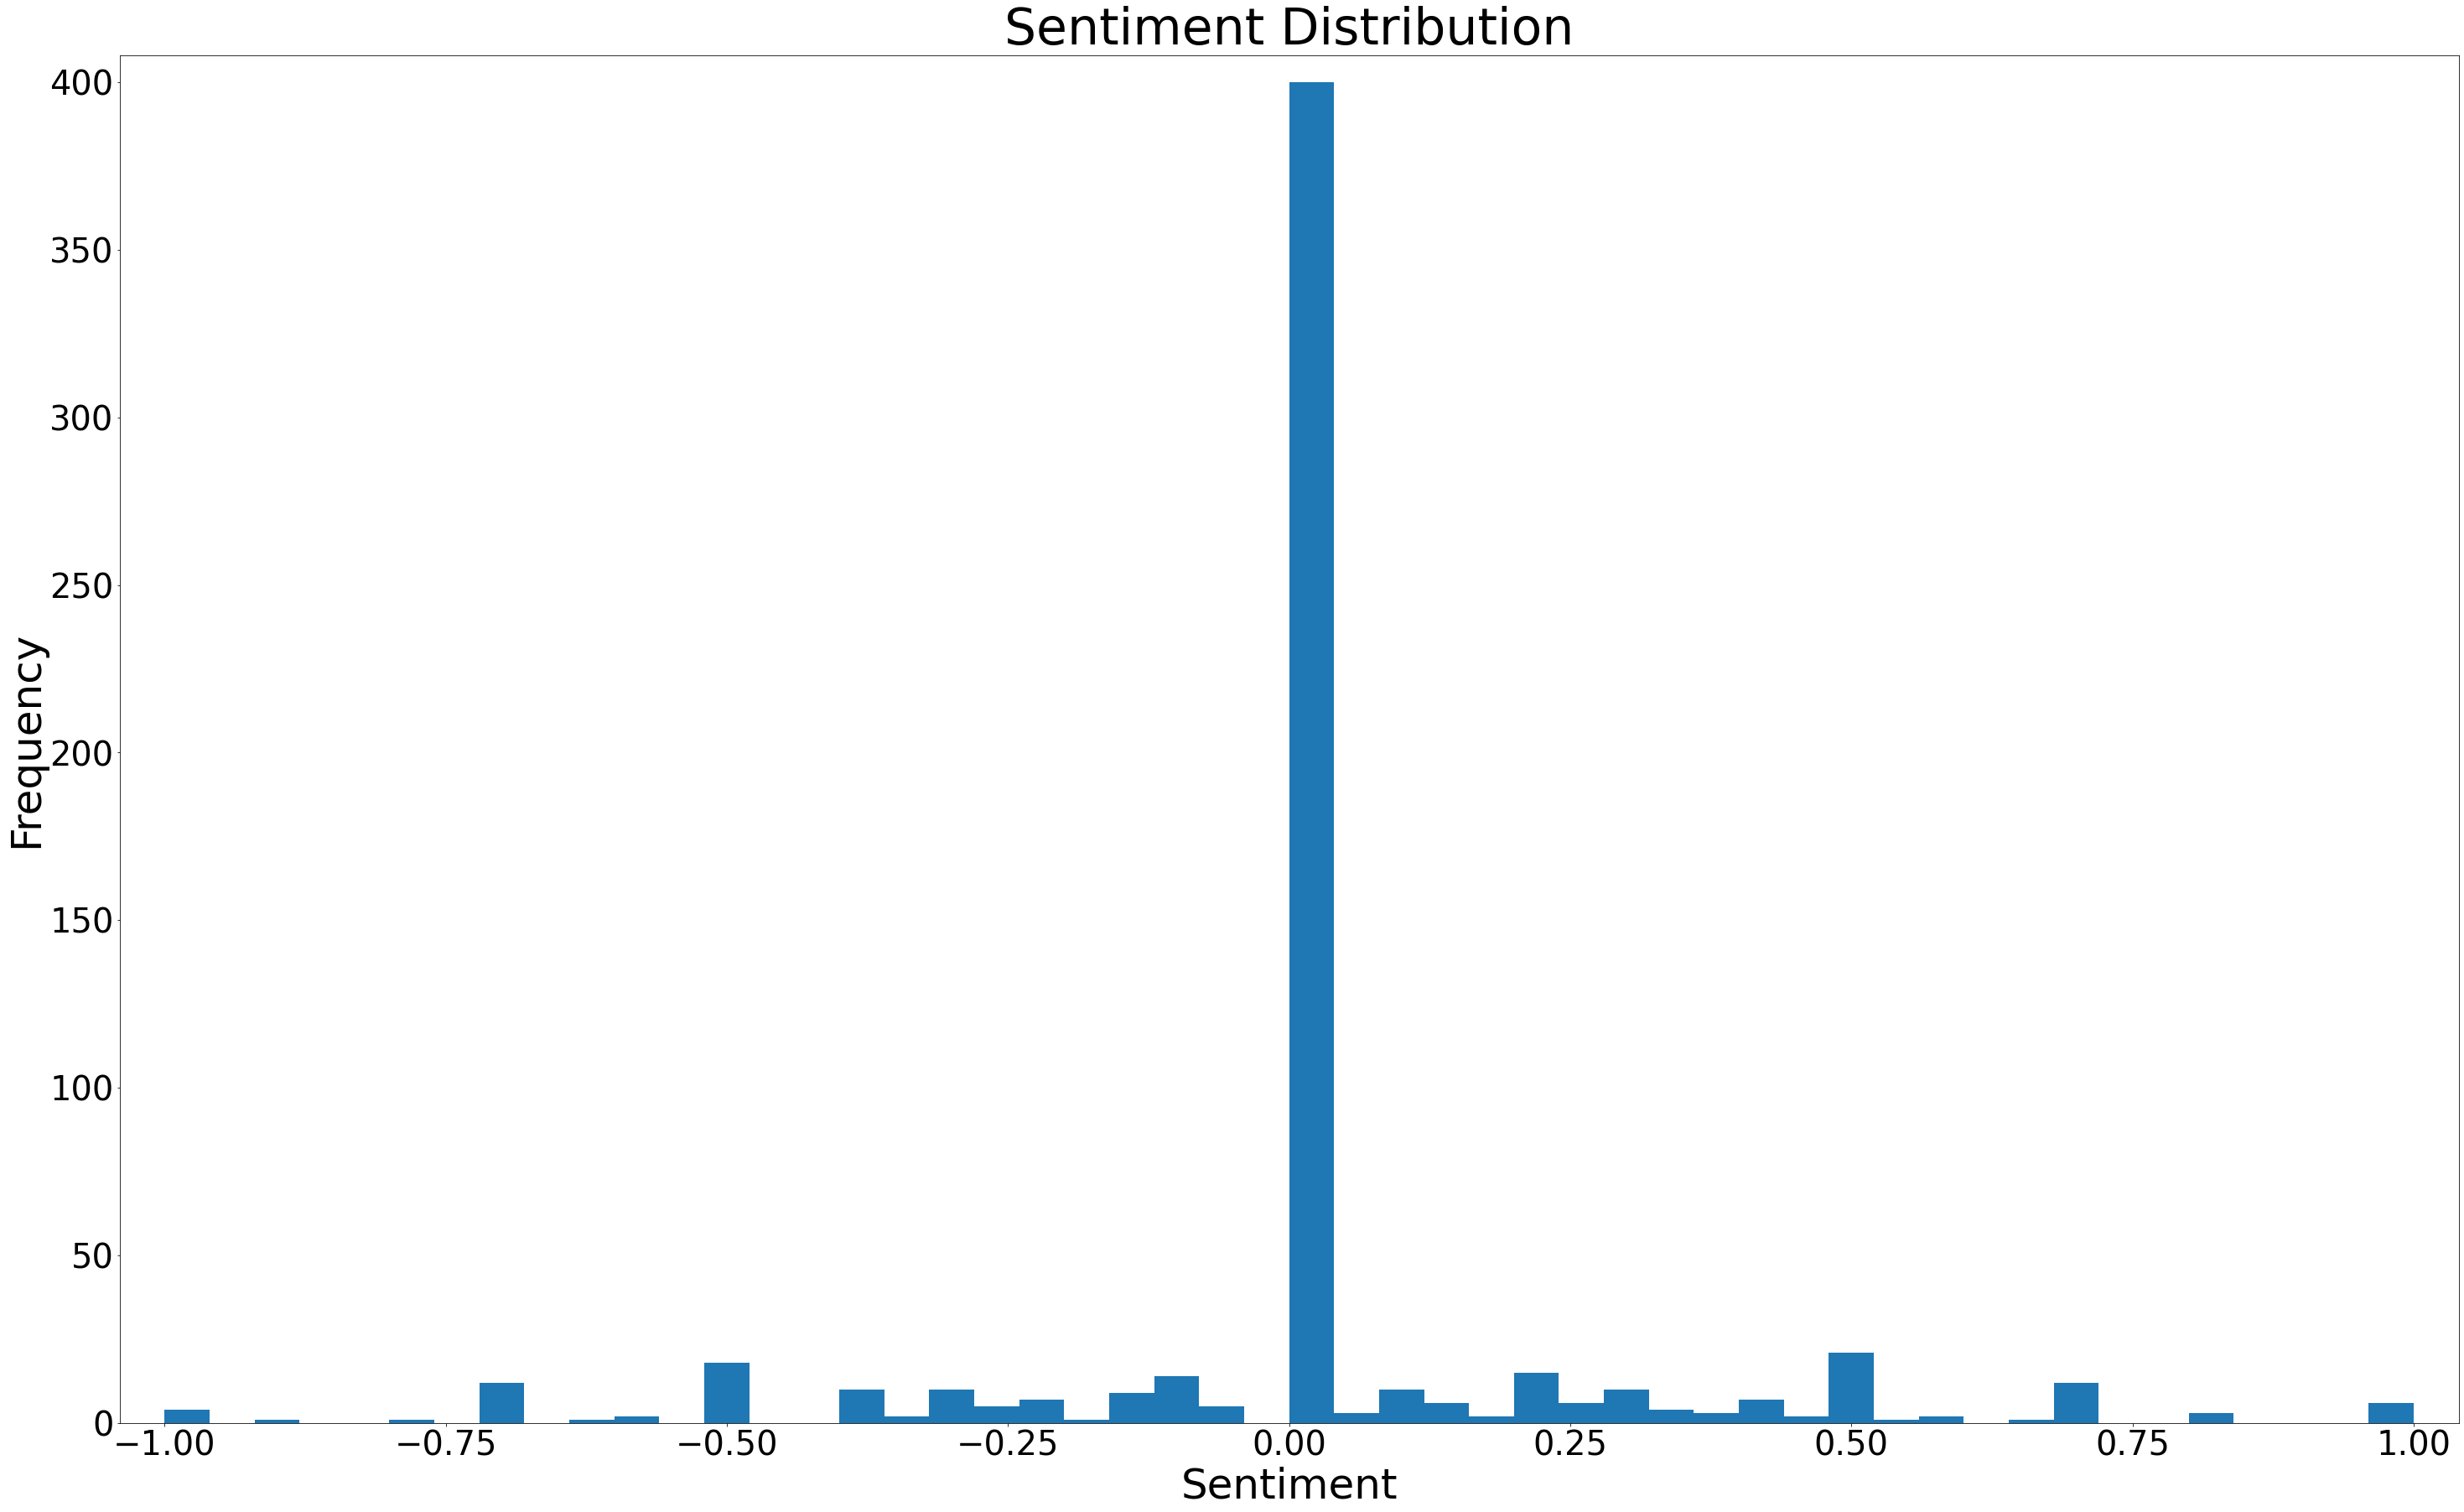

In [23]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(data['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

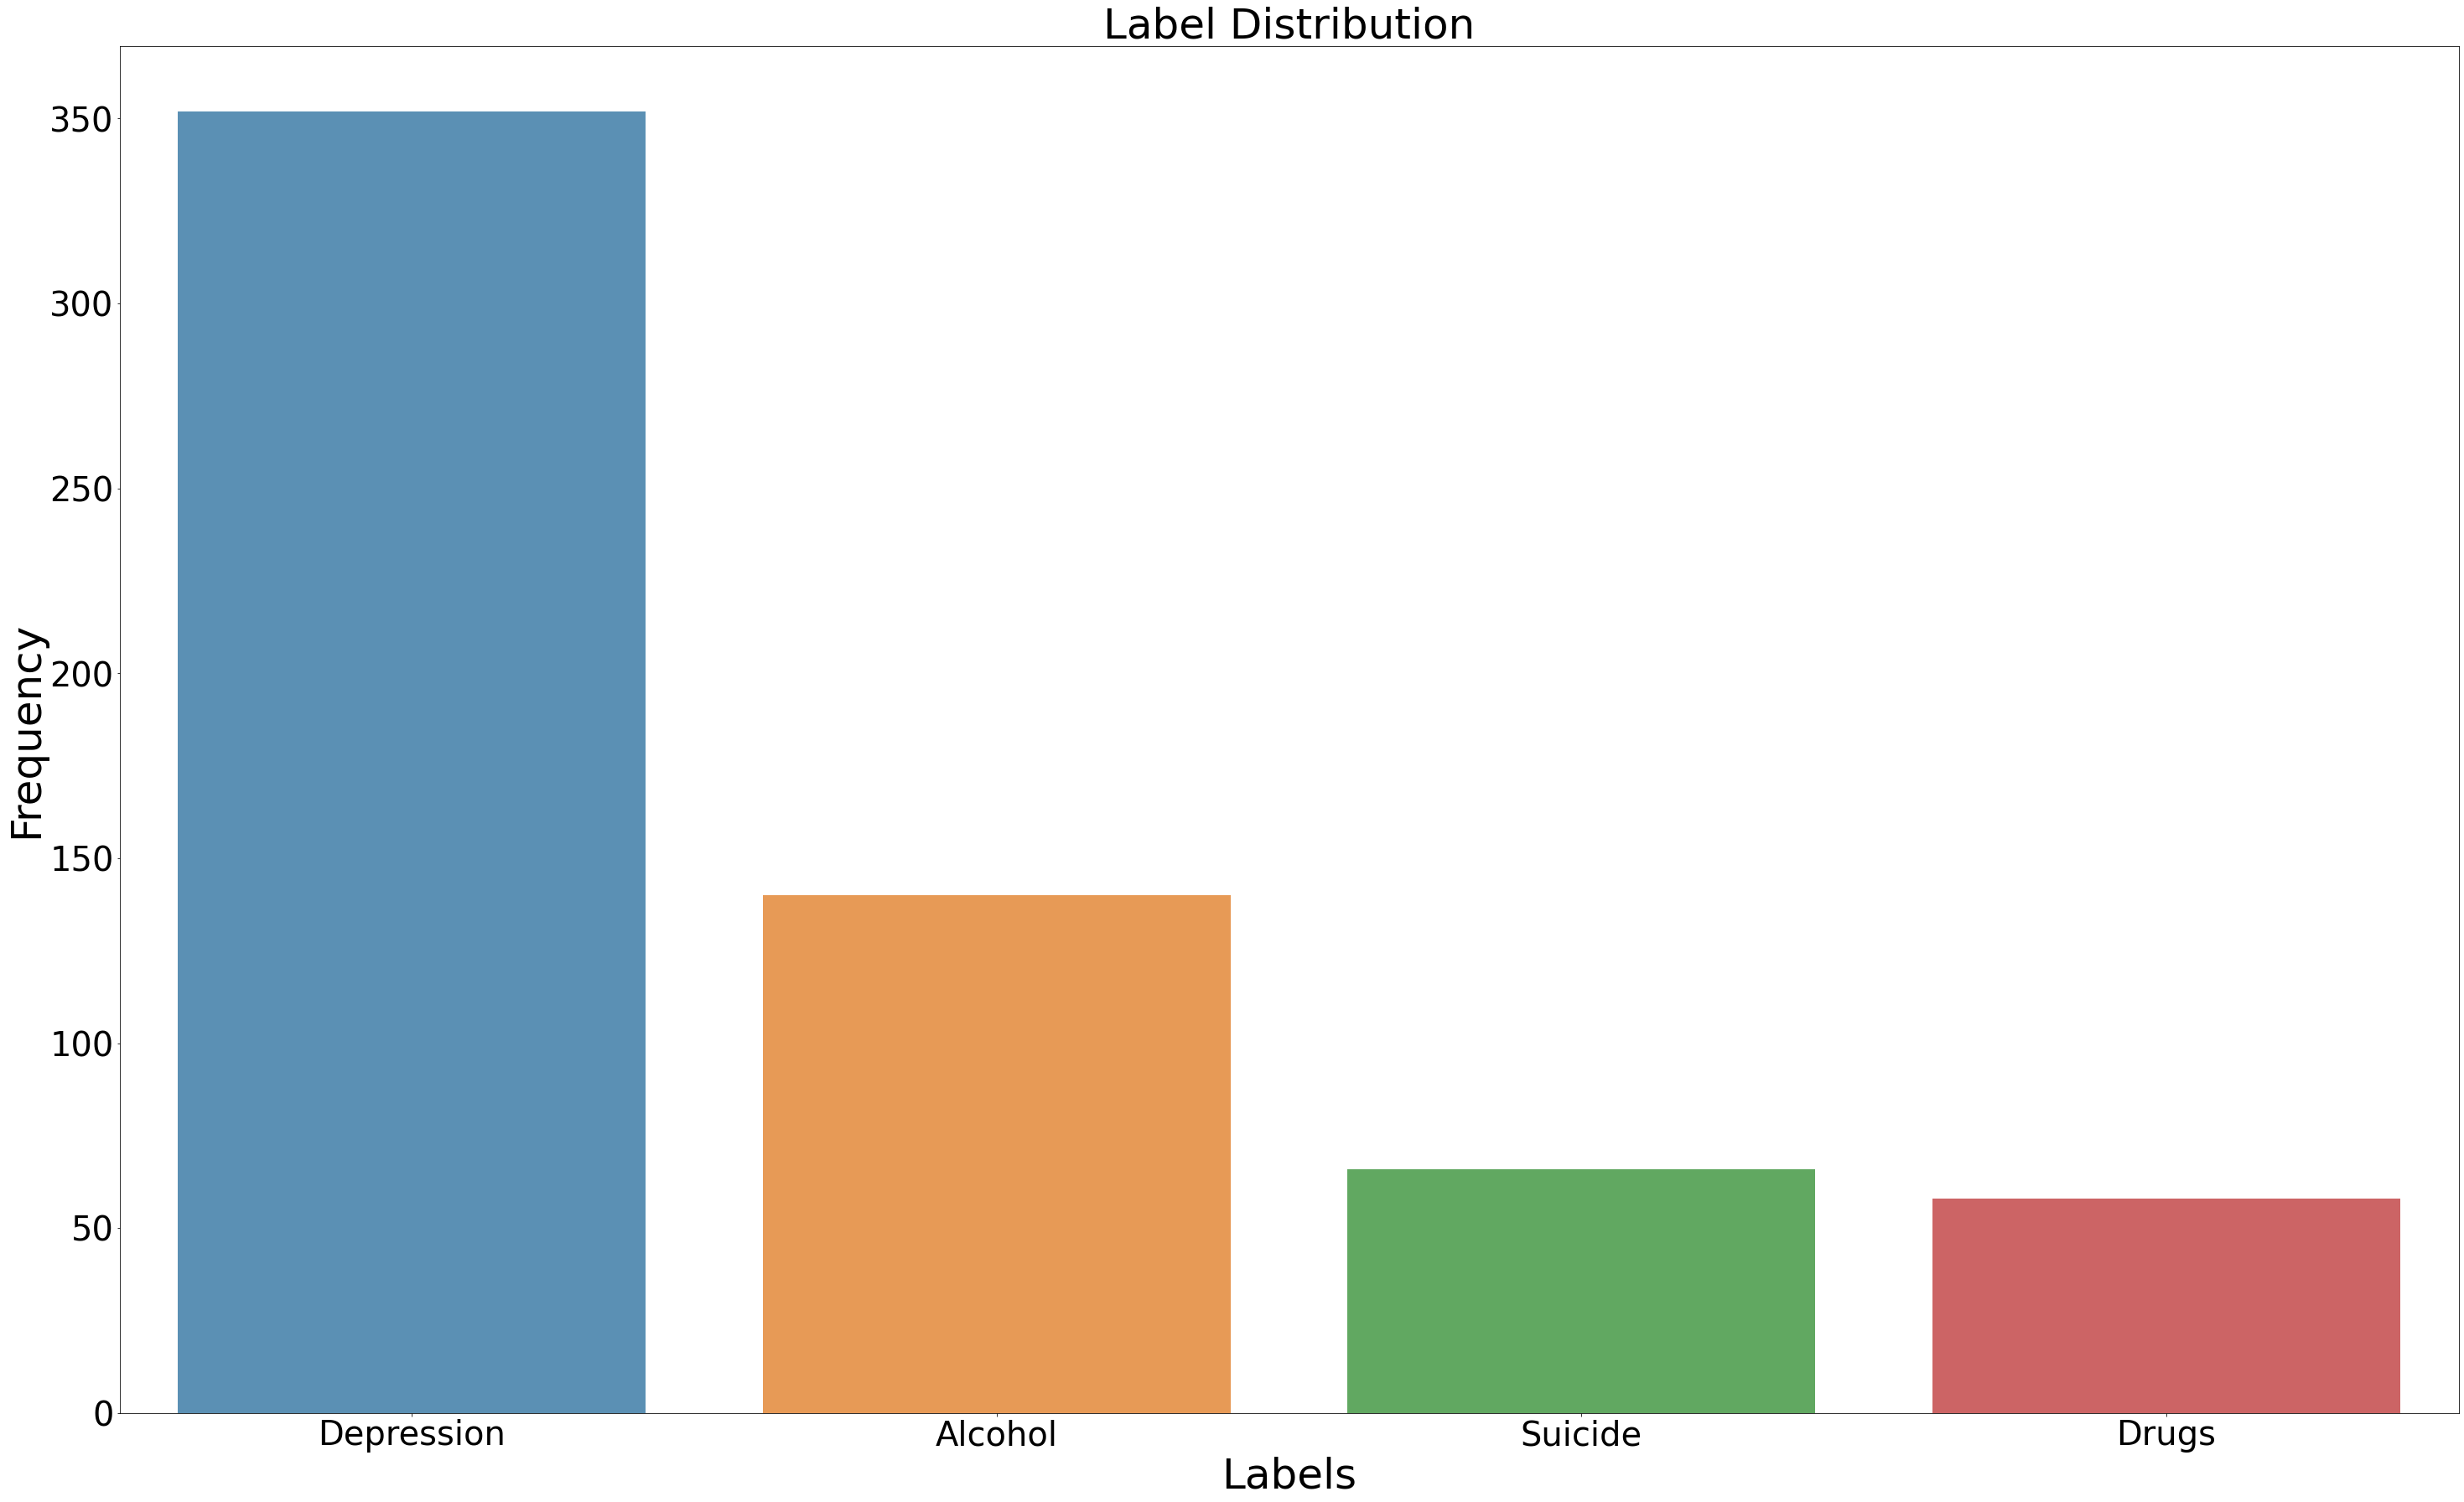

In [25]:
x_rating = data.label.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Label Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Labels', fontsize=50)
plt.xticks(fontsize=40)

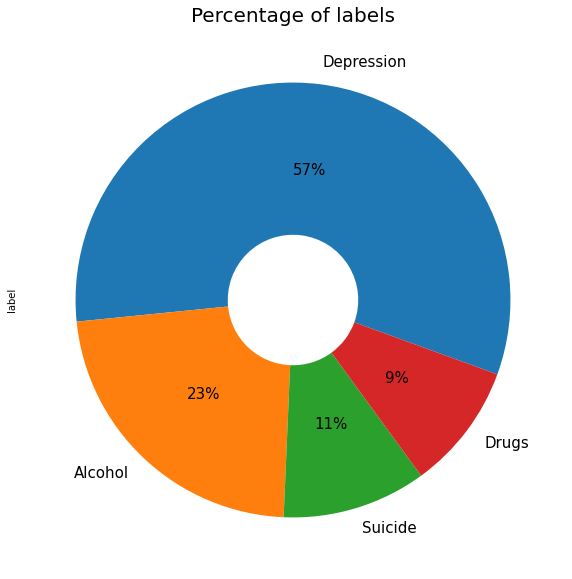

In [28]:
plt.figure(figsize=(30,10))
plt.title('Percentage of labels', fontsize=20)
data.label.value_counts().plot(kind='pie', labels=['Depression', 'Alcohol', 'Suicide', 'Drugs'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

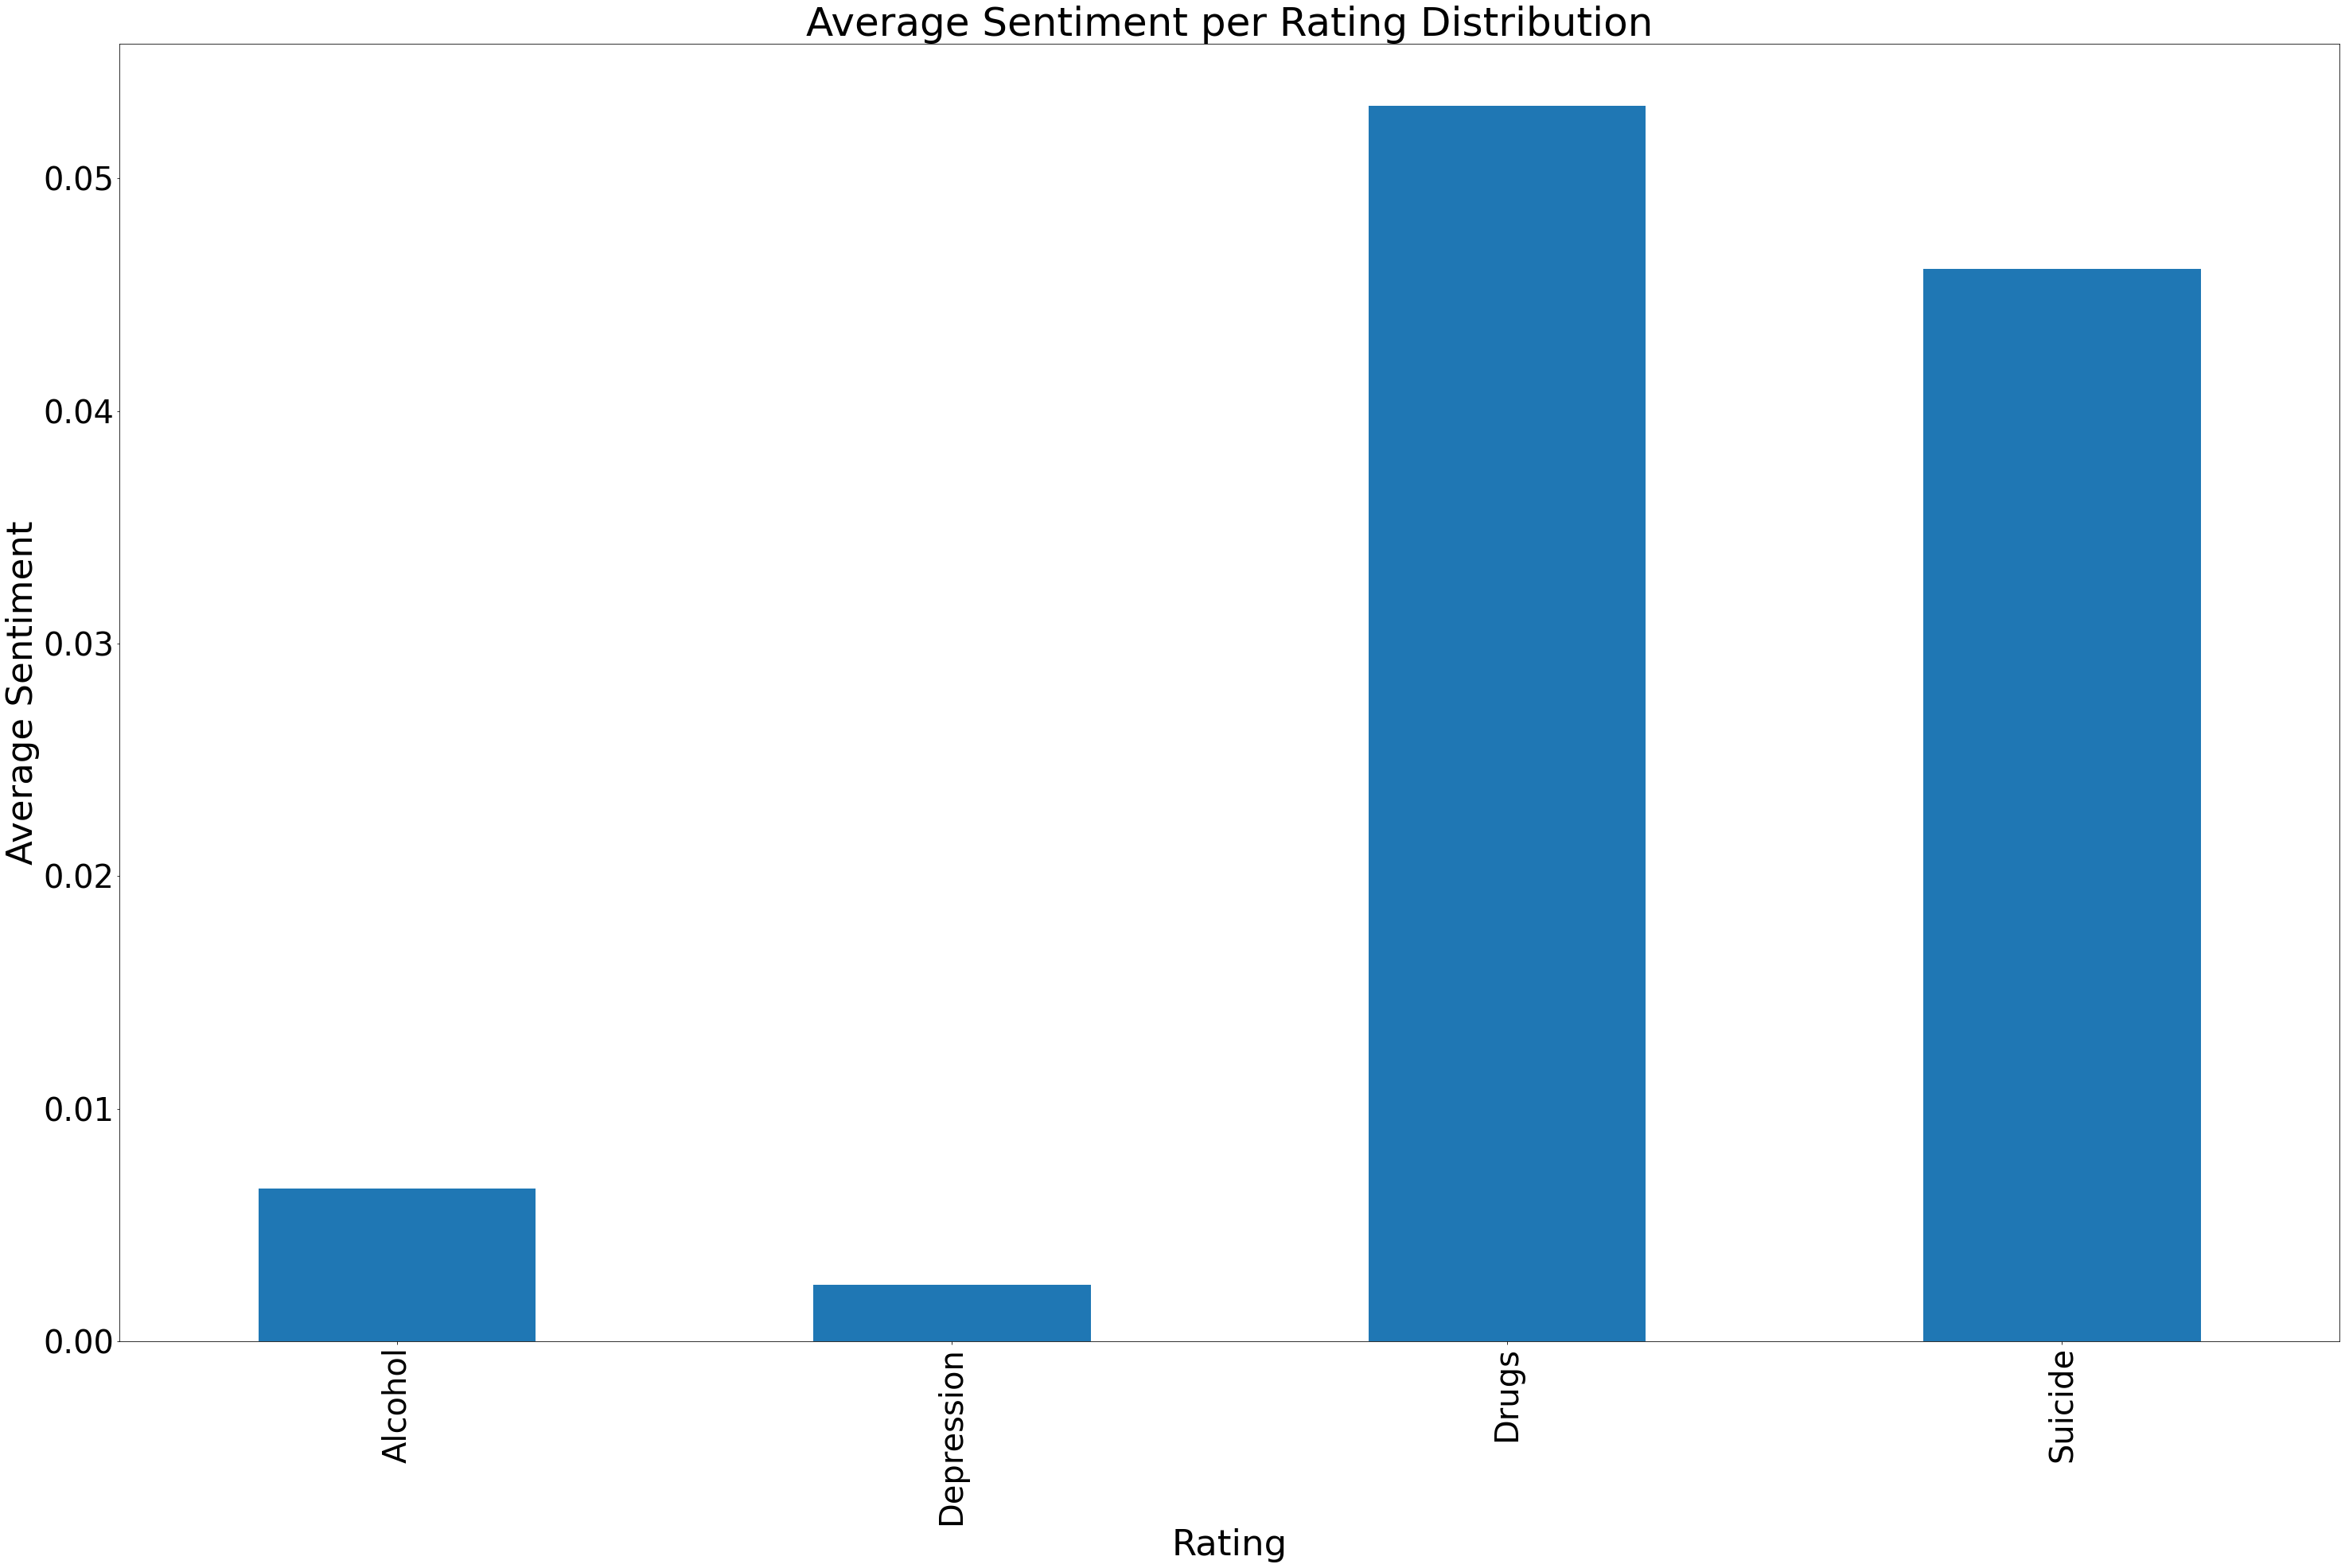

In [29]:
polarity_avg = data.groupby('label')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

In [30]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))
data['text_len'] = data['text'].astype(str).apply(len)

In [31]:
data.head()

,ID,text,label,sentiment,word_count,text_len
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,0.6500,9,39
1,9JDAGUV3,Why do I get hallucinations?,Drugs,0.0000,5,28
2,419WR1LQ,I am stresseed due to lack of financial support in school,Depression,-0.0625,11,57
3,6UY7DX6Q,Why is life important?,Suicide,0.4000,4,22
4,FYC0FTFB,How could I be helped to go through the depression?,Depression,0.0000,10,51


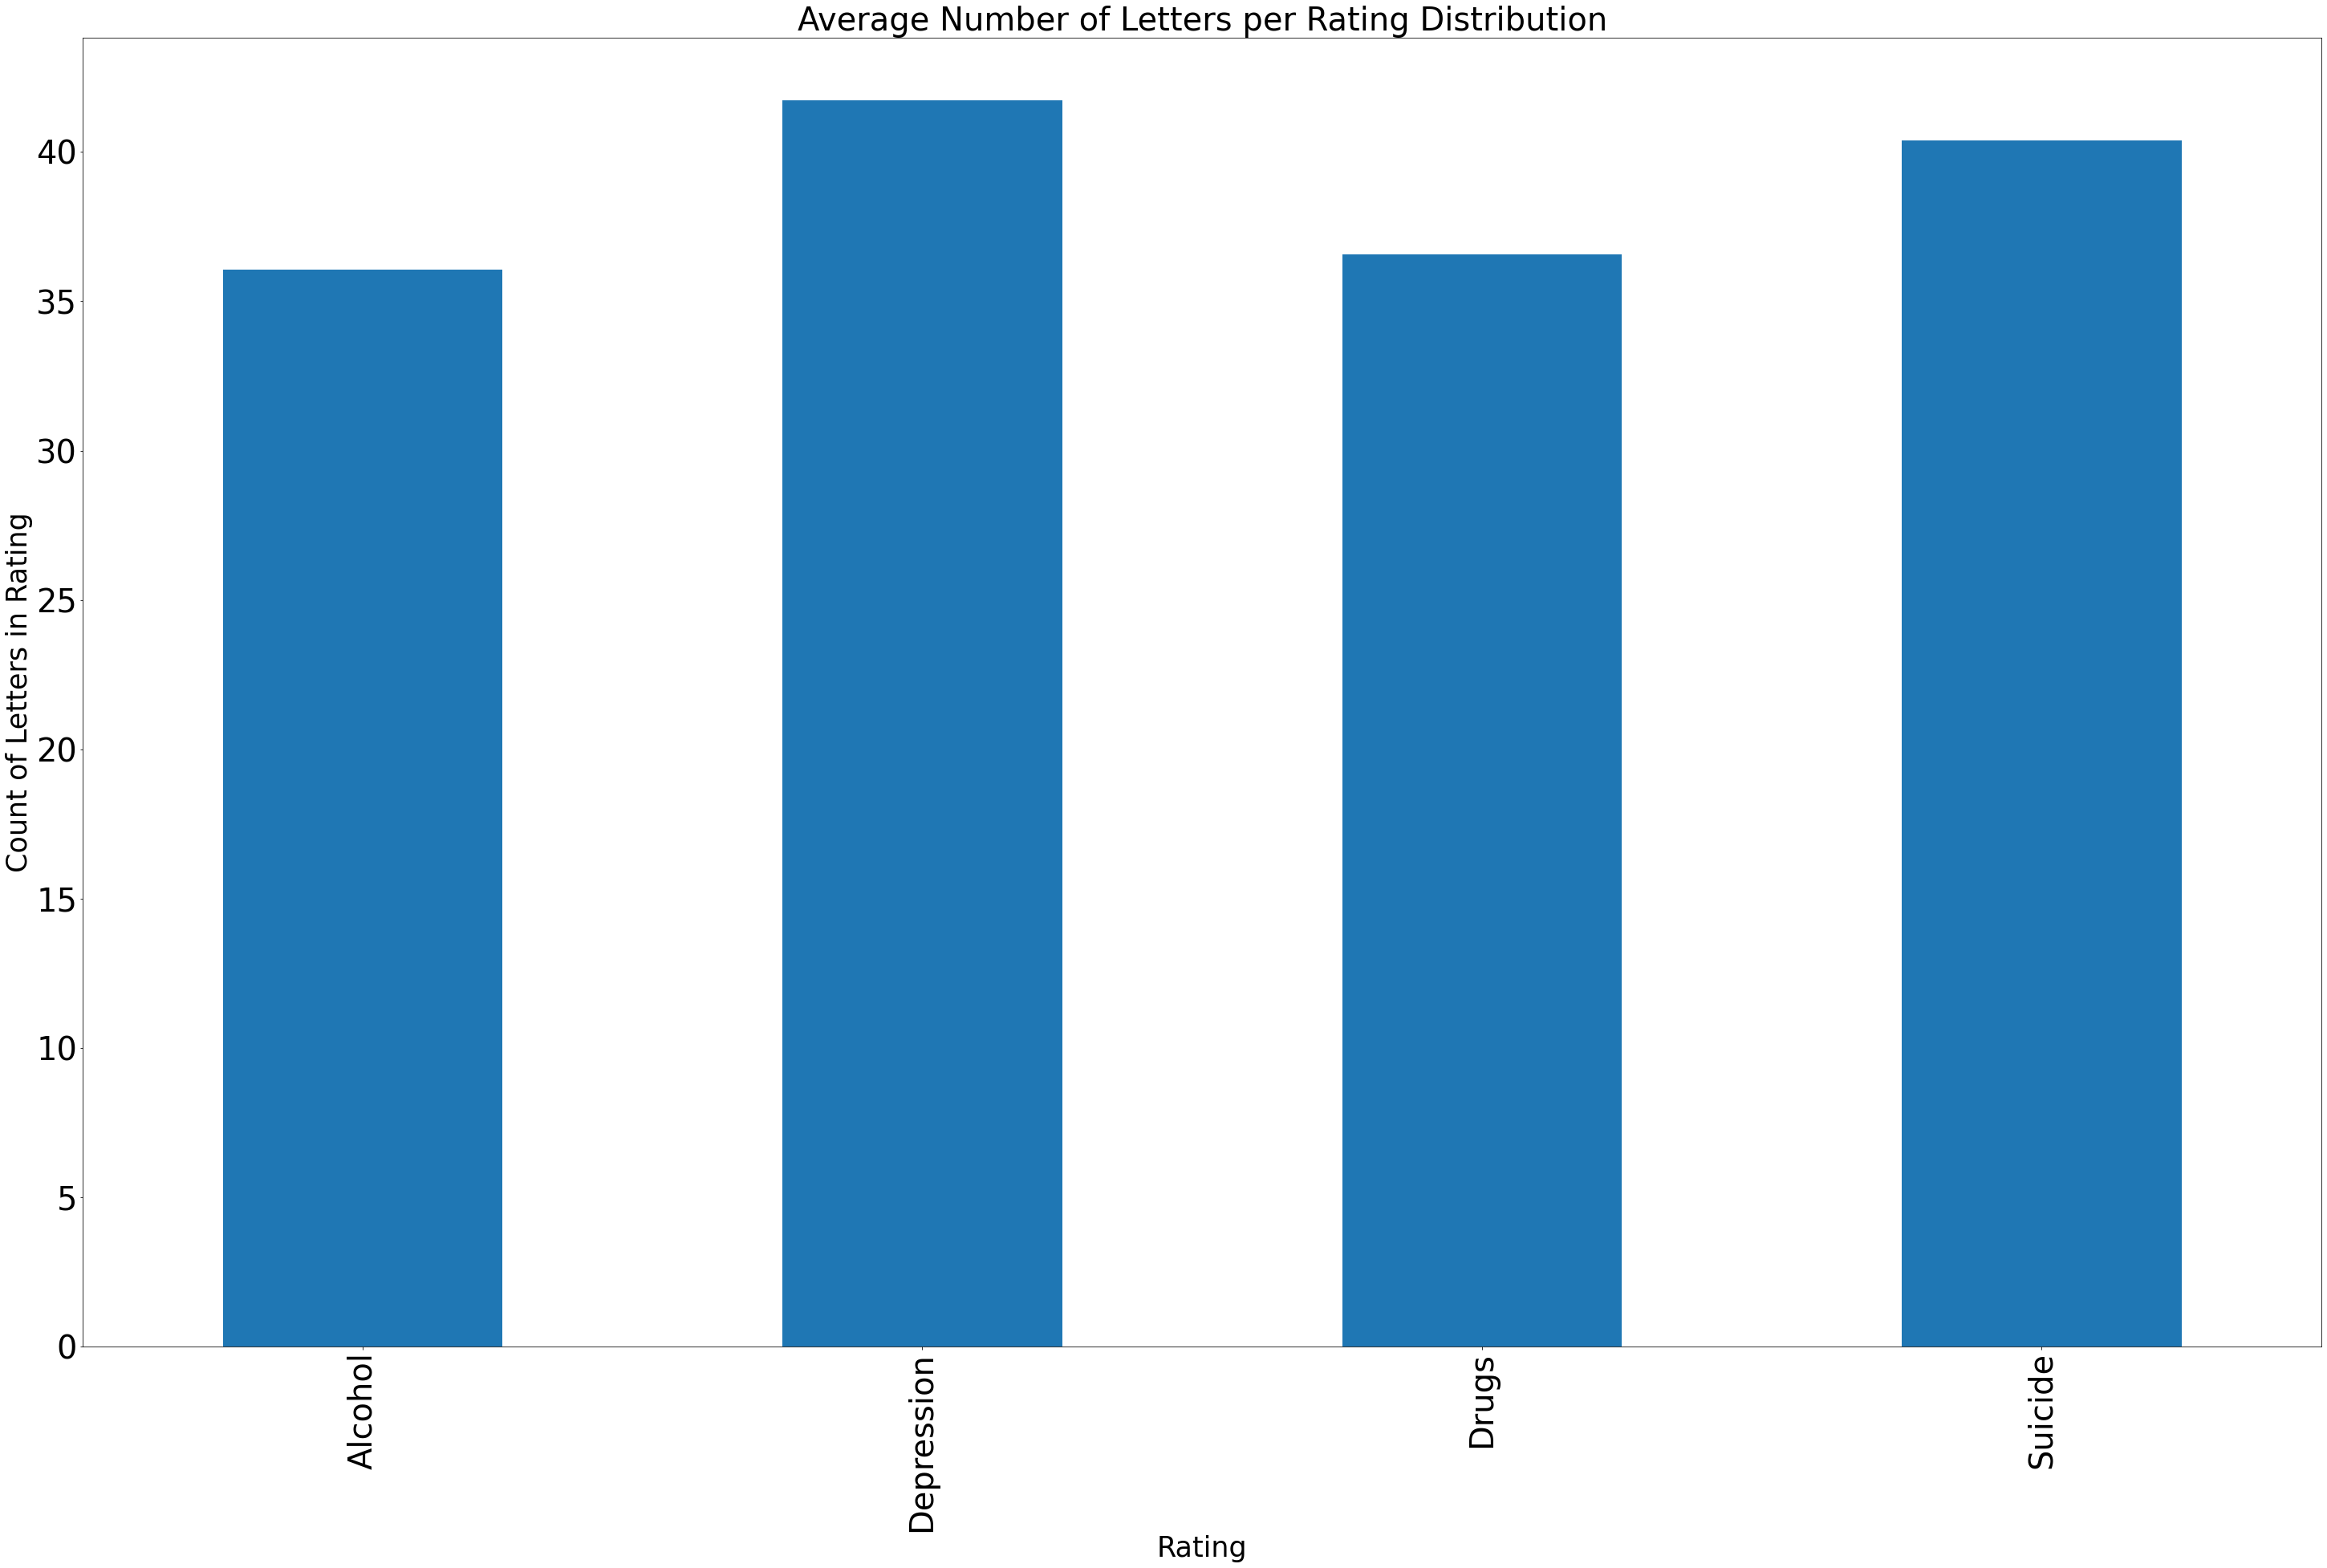

In [33]:
letter_avg = data.groupby('label')['text_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Rating Distribution', fontsize=40)
plt.show()

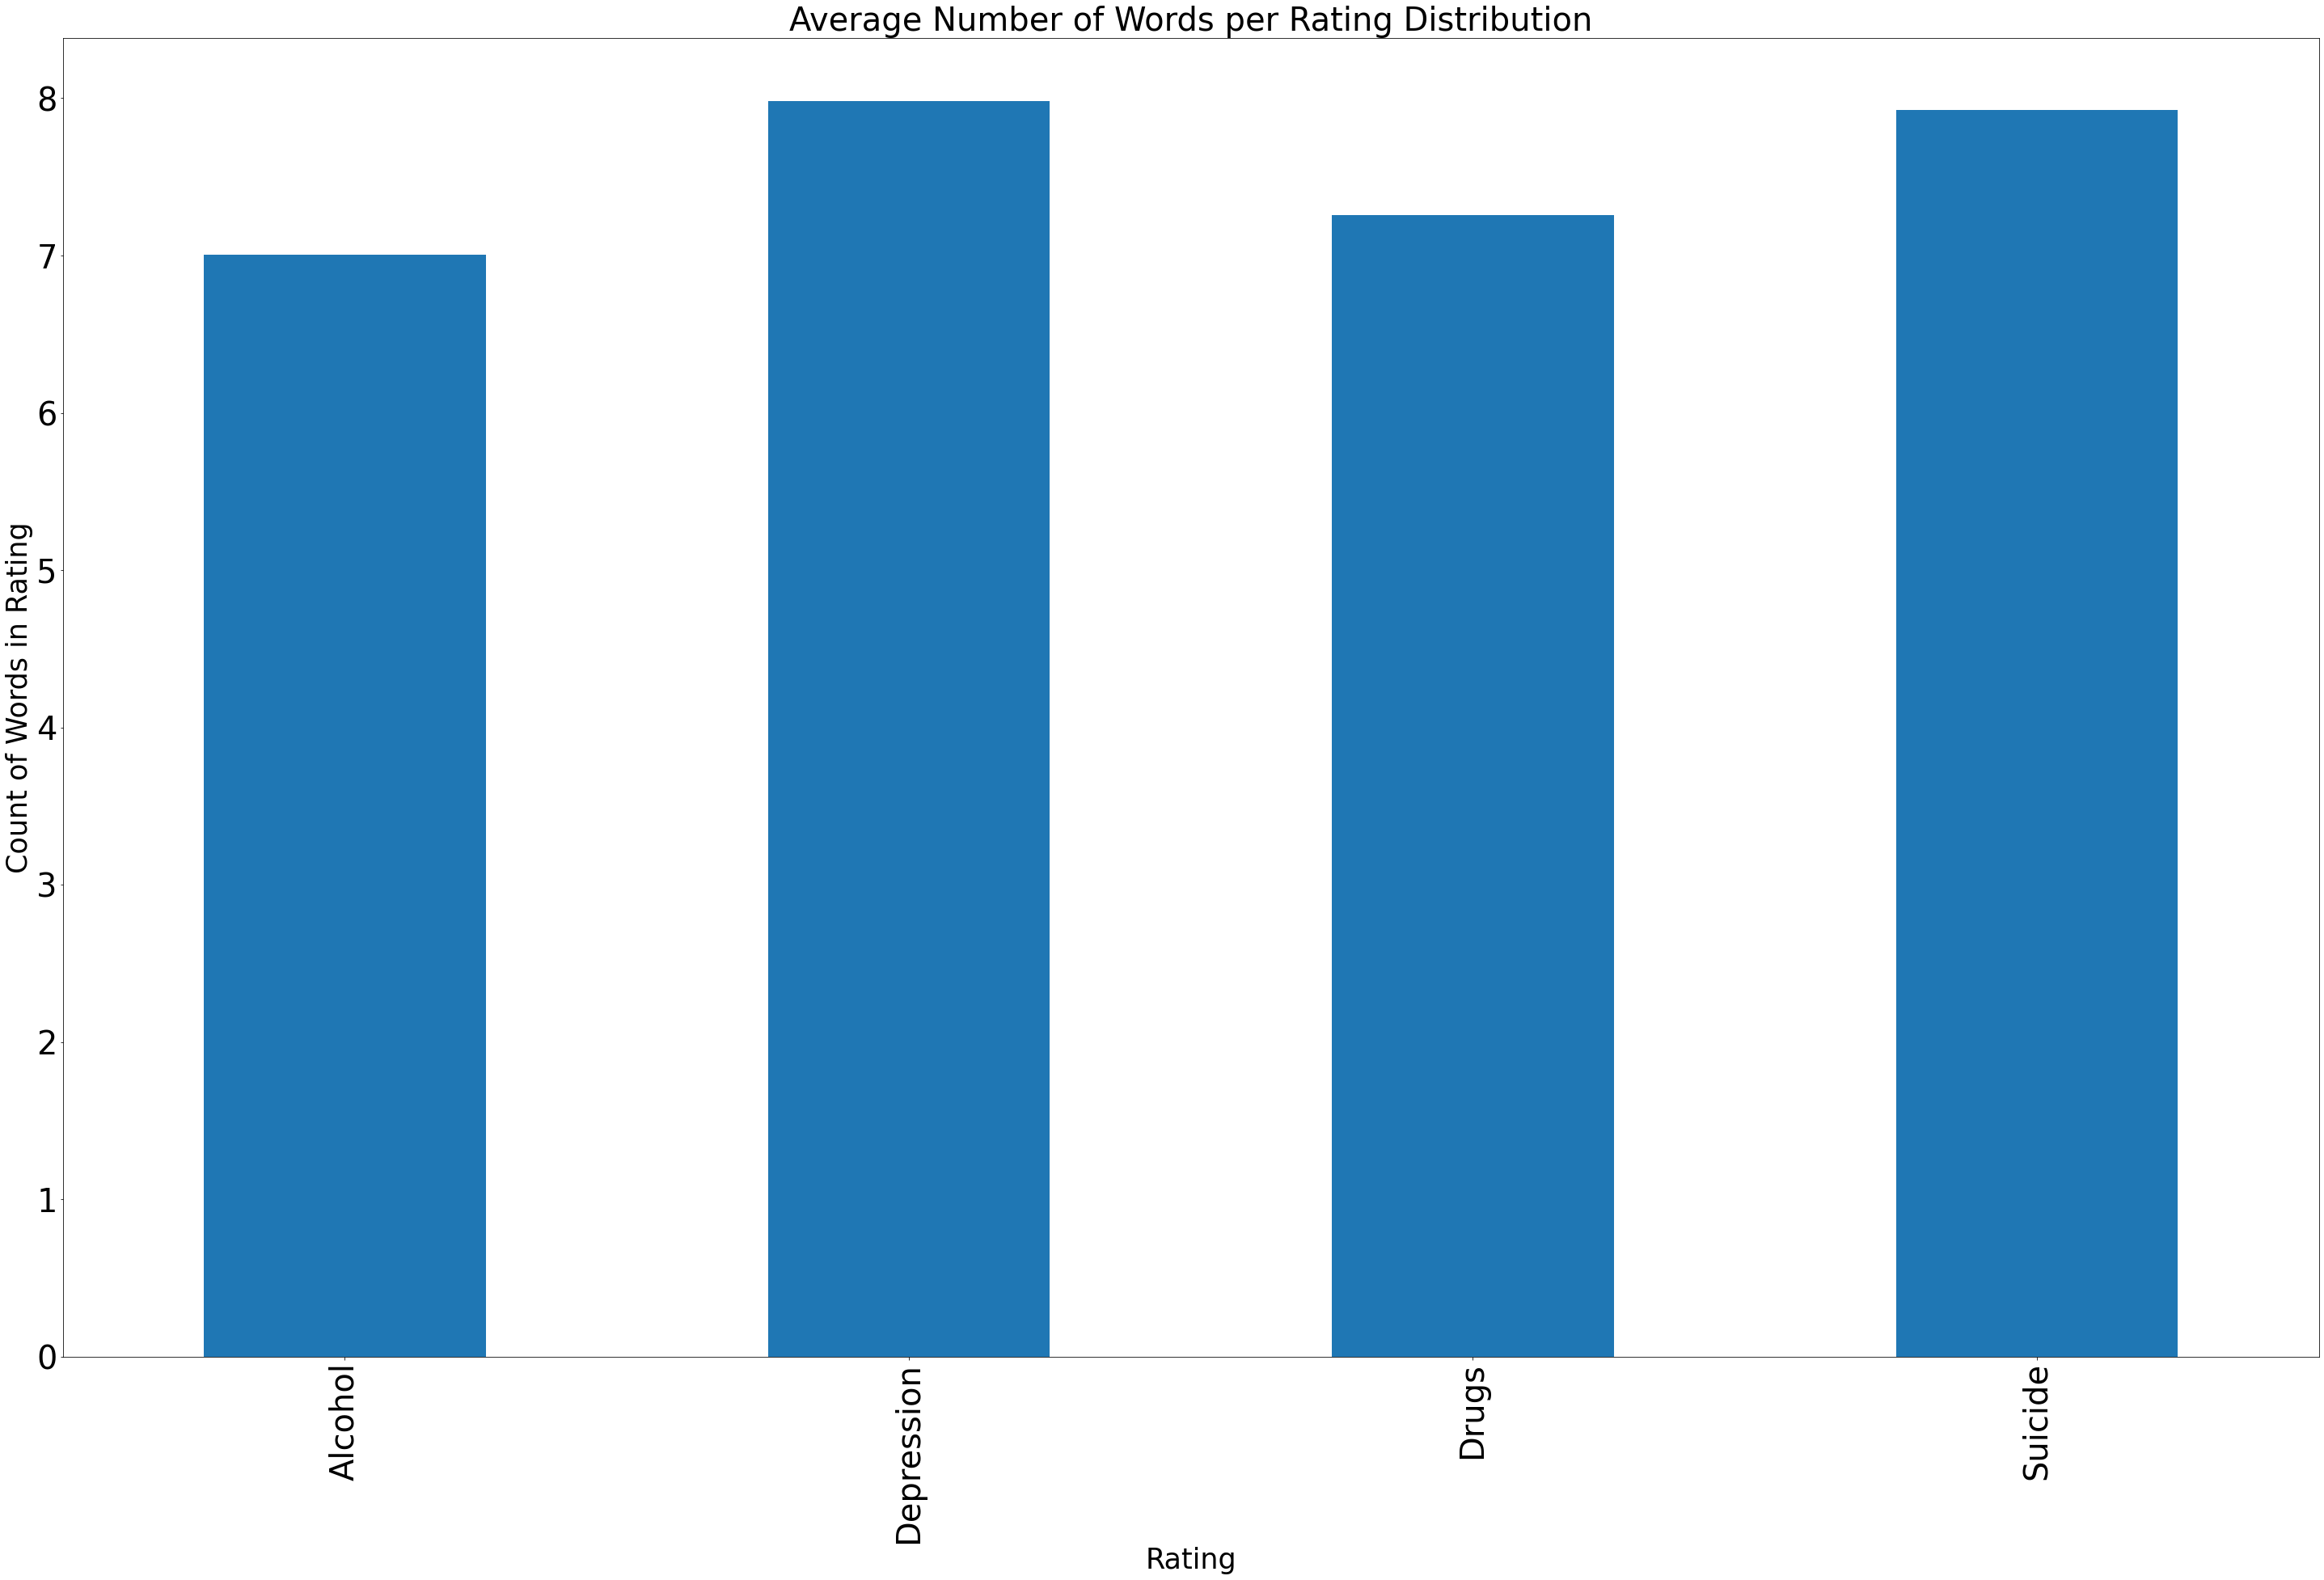

In [34]:
word_avg = data.groupby('label')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Rating Distribution', fontsize=40)
plt.show()

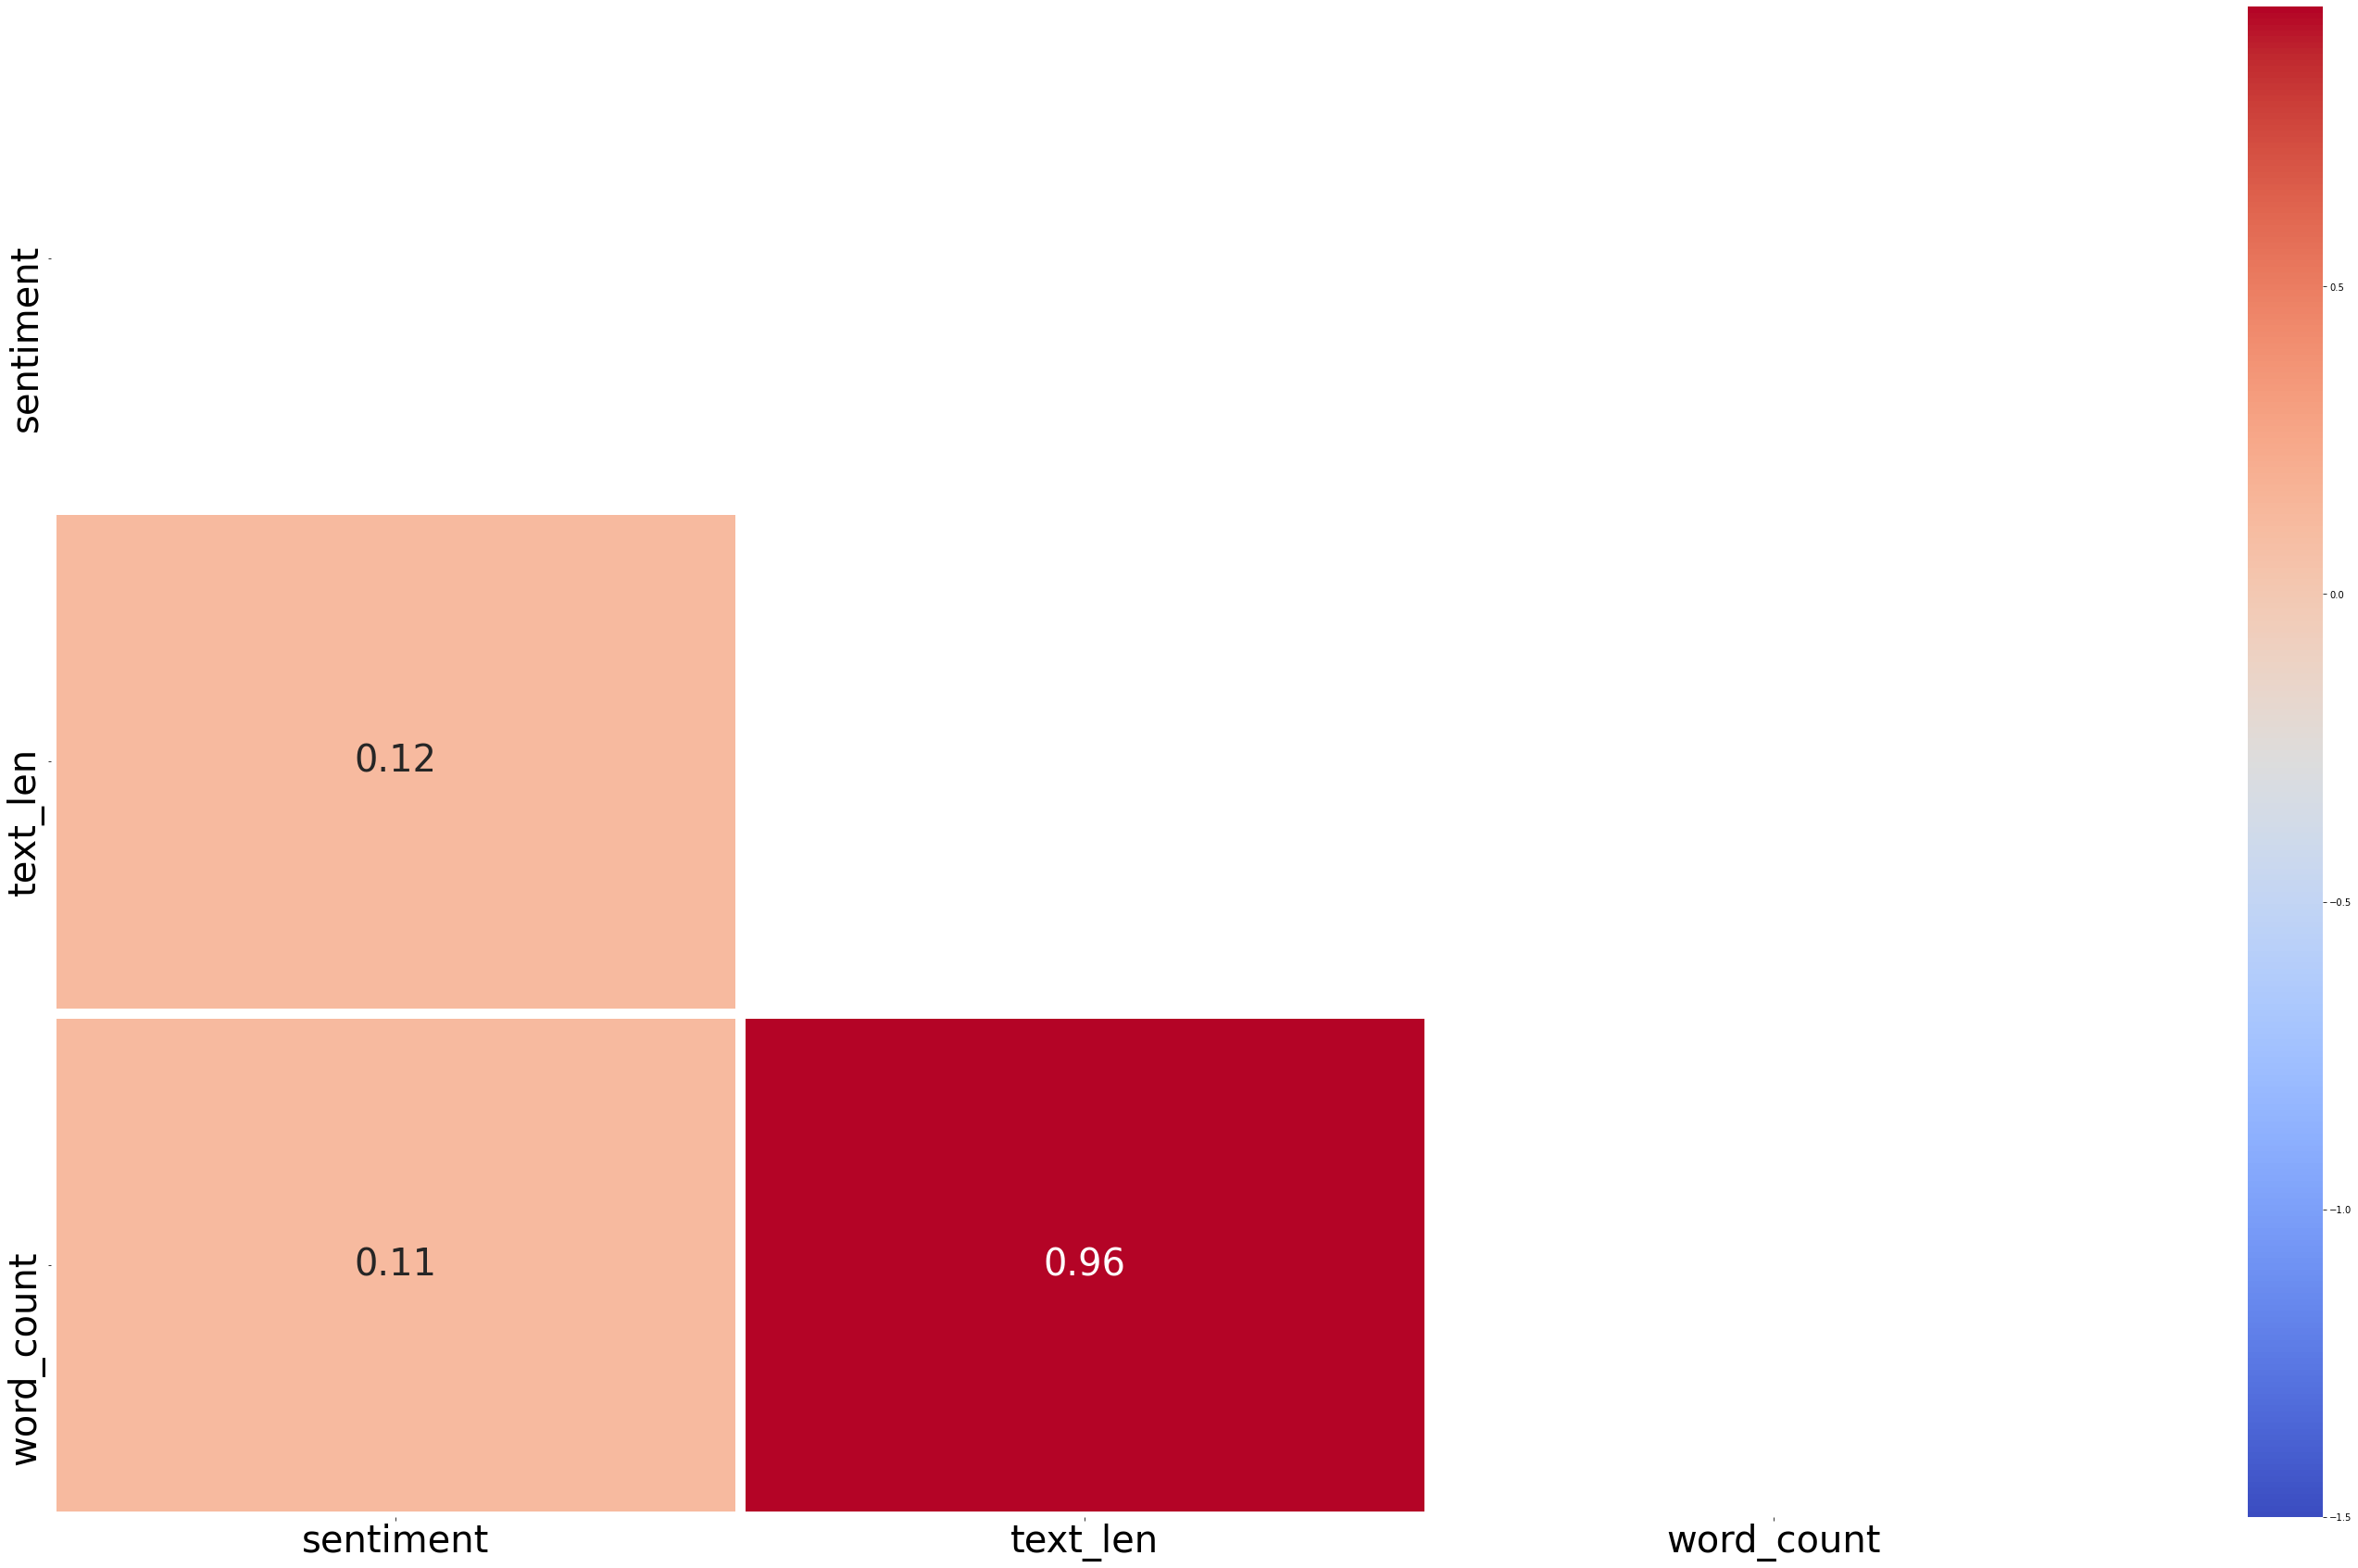

In [37]:
correlation = data[['label','sentiment', 'text_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

In [41]:
words = data['text']
allwords = []
for wordlist in words:
    allwords += wordlist.split()
print(allwords)

['I', 'feel', 'that', 'it', 'was', 'better', 'I', 'dieAm', 'happy', 'Why', 'do', 'I', 'get', 'hallucinations?', 'I', 'am', 'stresseed', 'due', 'to', 'lack', 'of', 'financial', 'support', 'in', 'school', 'Why', 'is', 'life', 'important?', 'How', 'could', 'I', 'be', 'helped', 'to', 'go', 'through', 'the', 'depression?', 'What', 'are', 'the', 'effects', 'of', 'depression', 'to', 'ones', 'health', 'Why', 'is', 'everything', 'so', 'hard', 'to', 'deal', 'with', 'in', 'this', 'life', 'I', 'feel', 'emotionally', 'overwhelmed', 'How', 'to', 'manage', 'taking', 'alcohol?', 'Is', 'heaven', 'open', 'for', 'us', 'who', 'smoke', 'bhang?', 'How', 'to', 'survive', 'without', 'money?', 'How', 'do', 'i', 'stop', 'this?', 'What', 'do', 'I', 'do', 'when', 'life', 'becomes', 'unbearable?', 'I', 'was', 'ever', 'sad,alone', 'and', 'always', 'on', 'drugsNow', 'I', 'know', 'how', 'to', 'cope', 'with', 'negative', 'aspects', 'in', 'my', 'life', 'I', 'feel', 'empty,absent', 'minded', 'I', 'experienced', 'depress

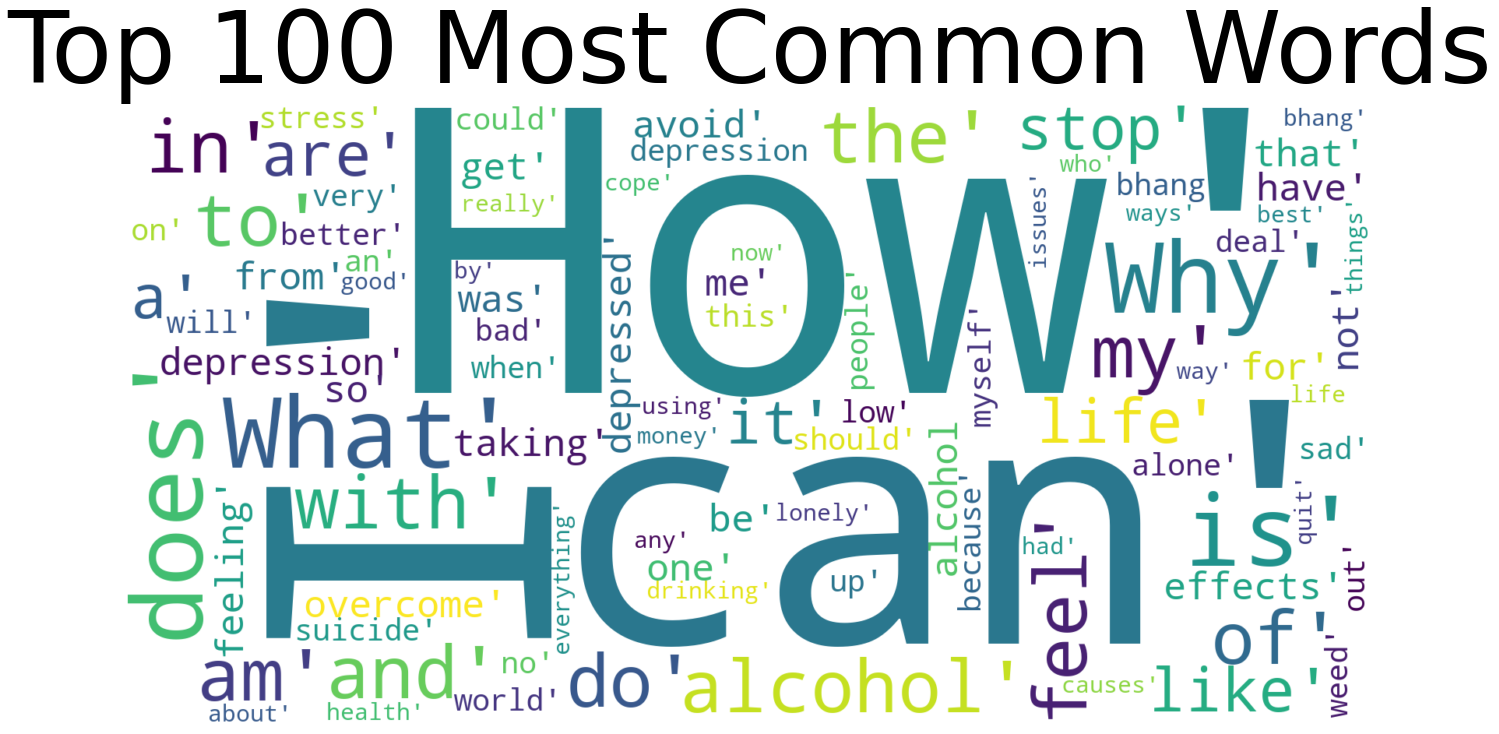

In [46]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

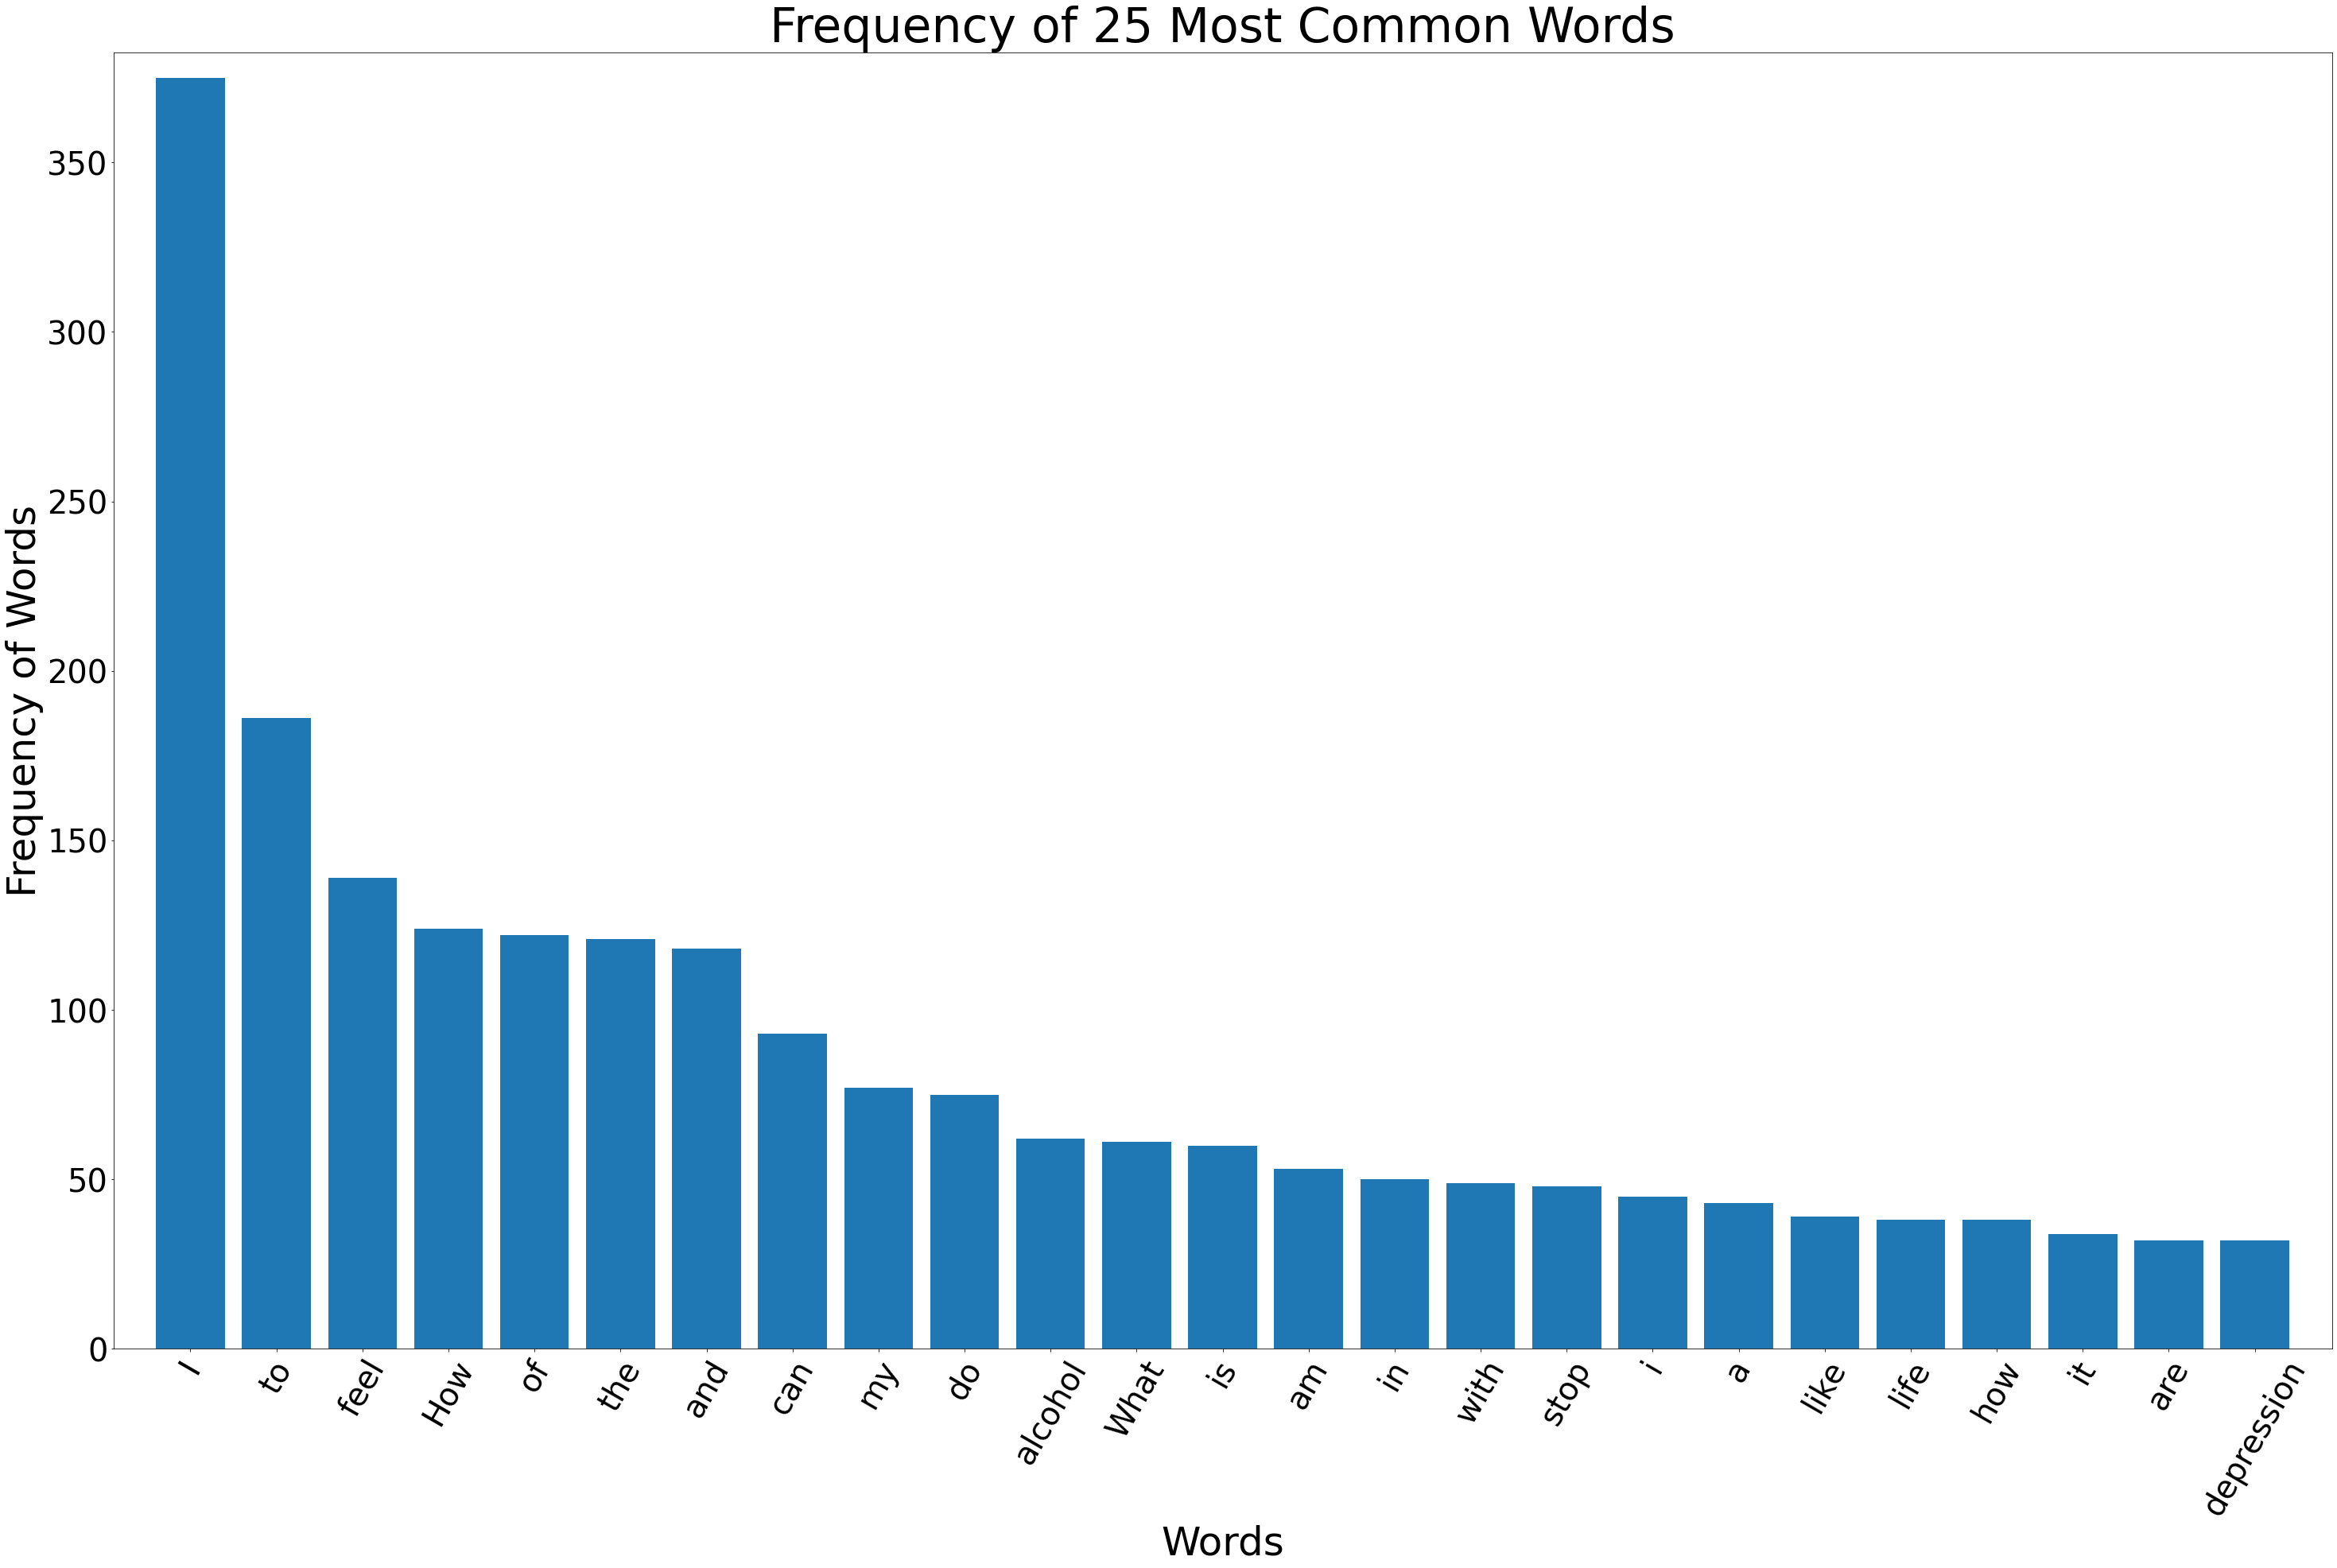

In [47]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

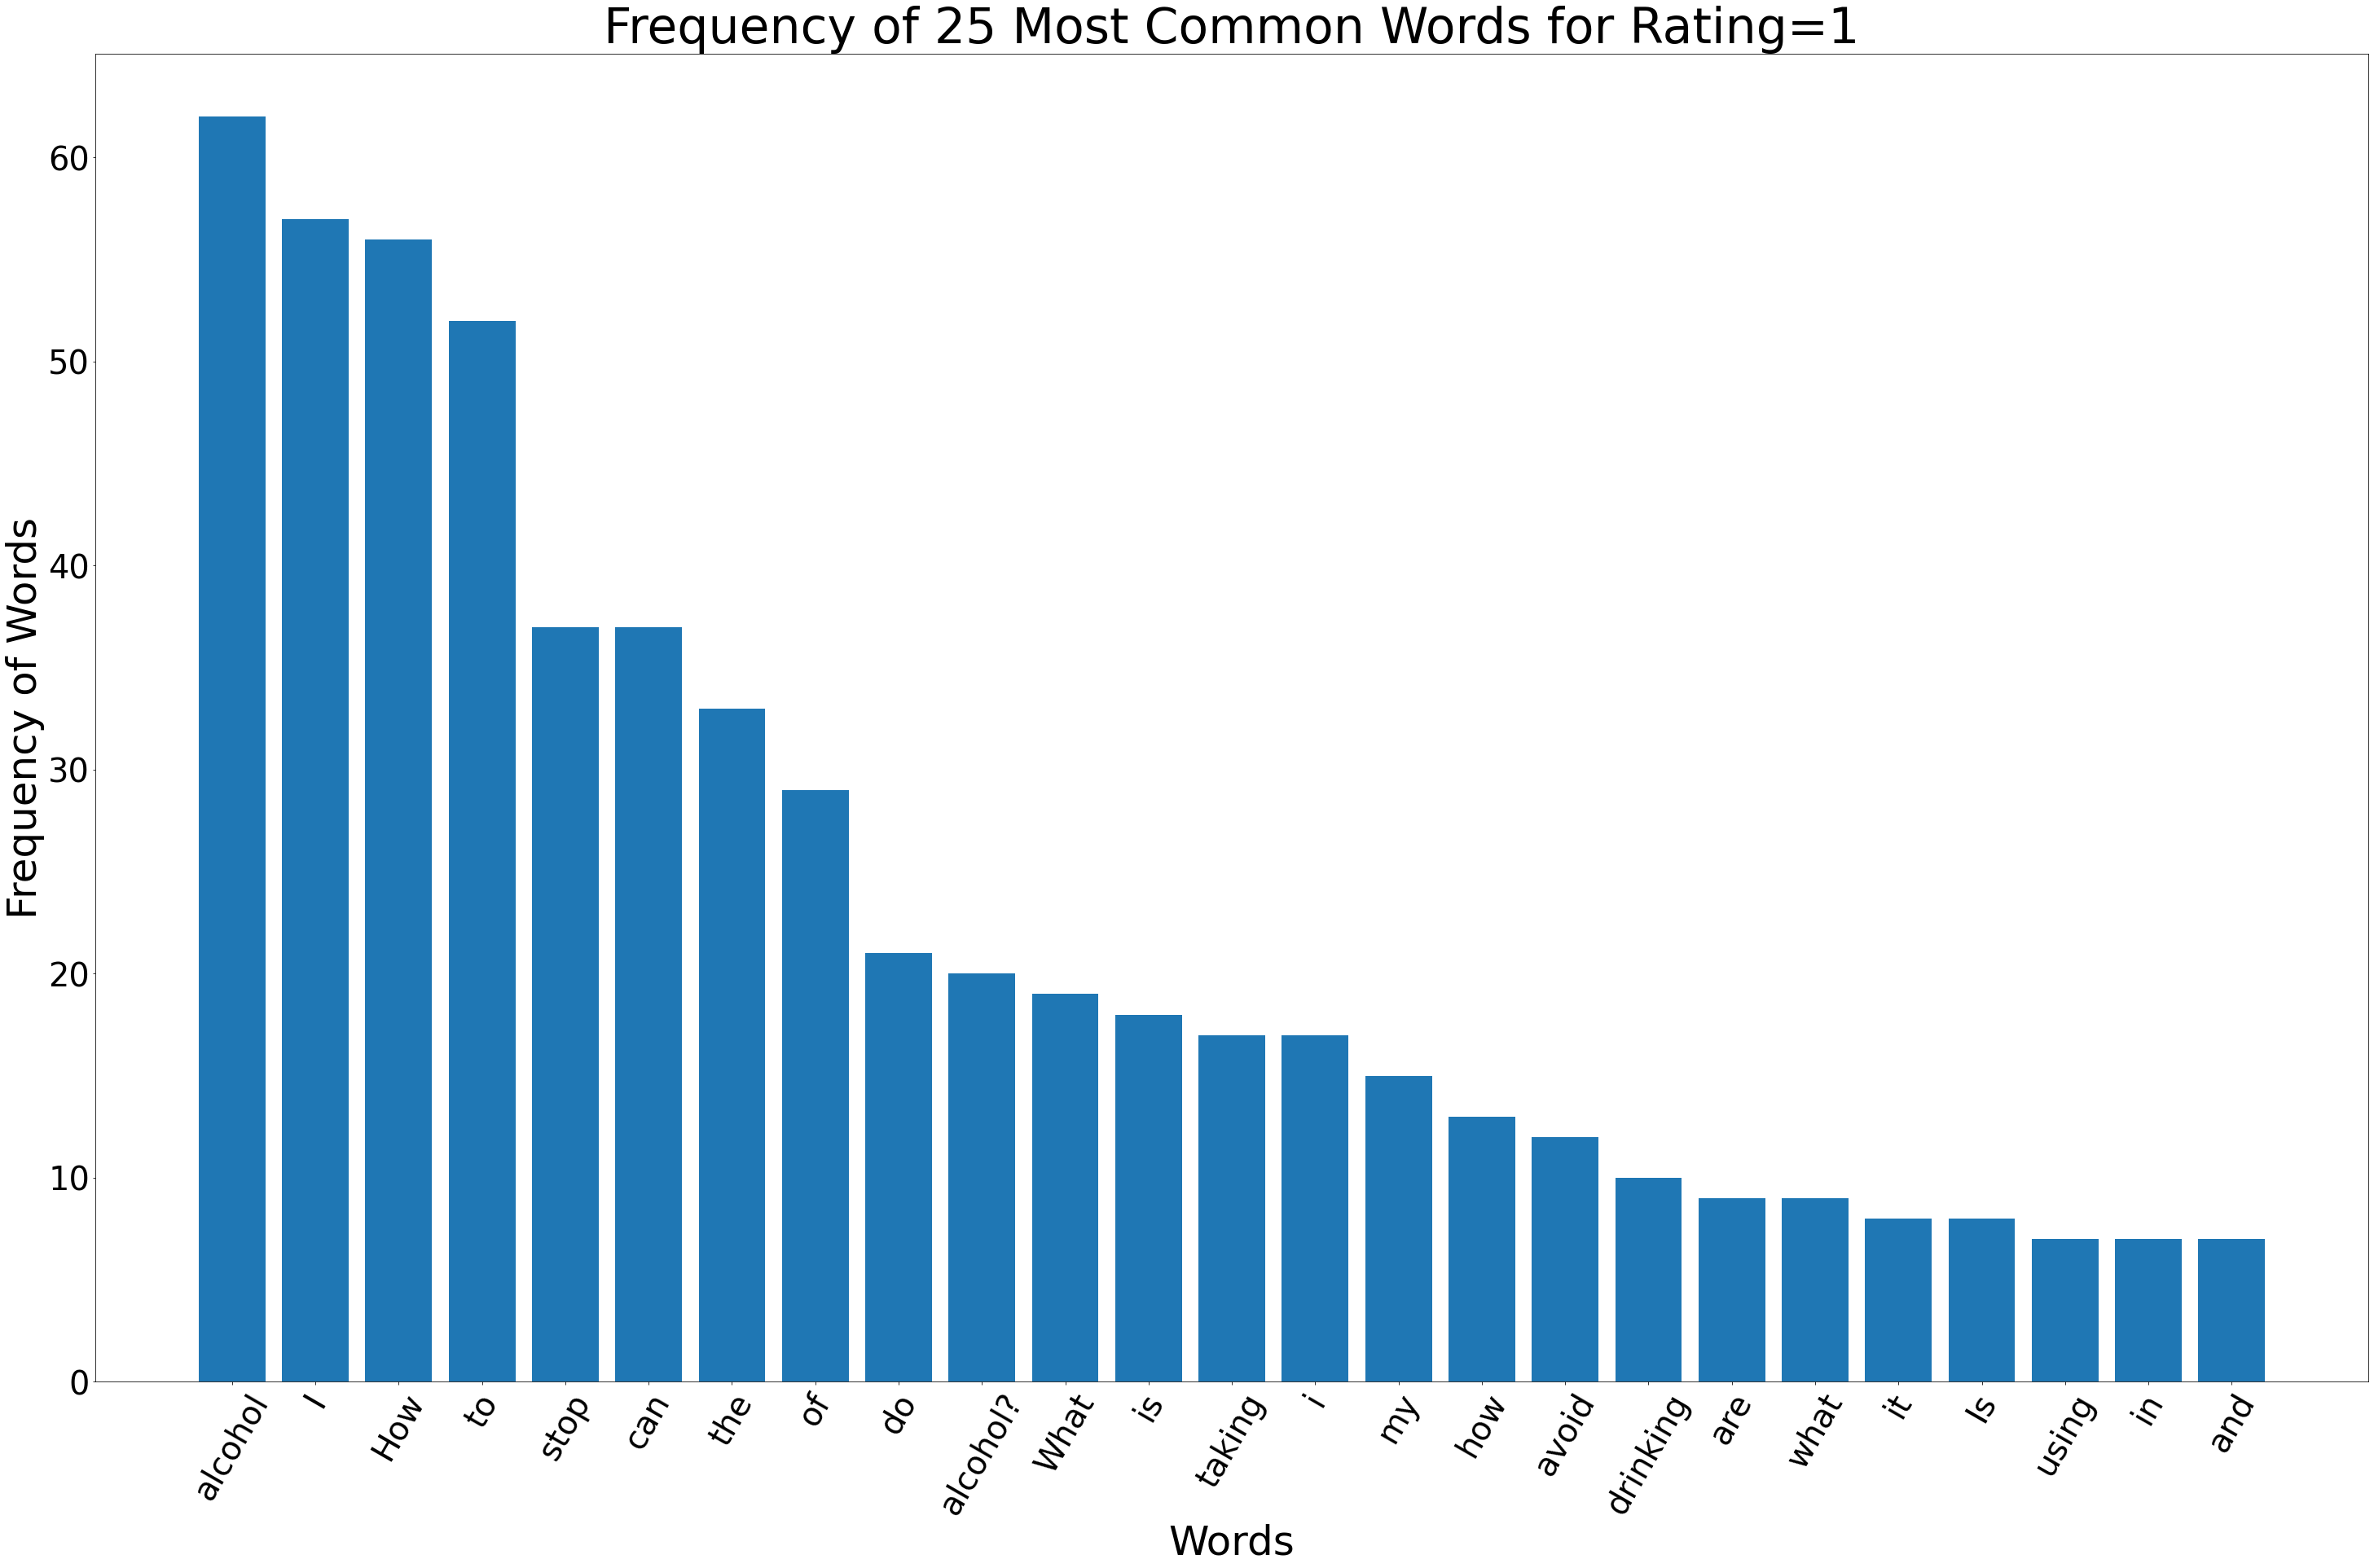

In [50]:
group_by = data.groupby('label')['text'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()

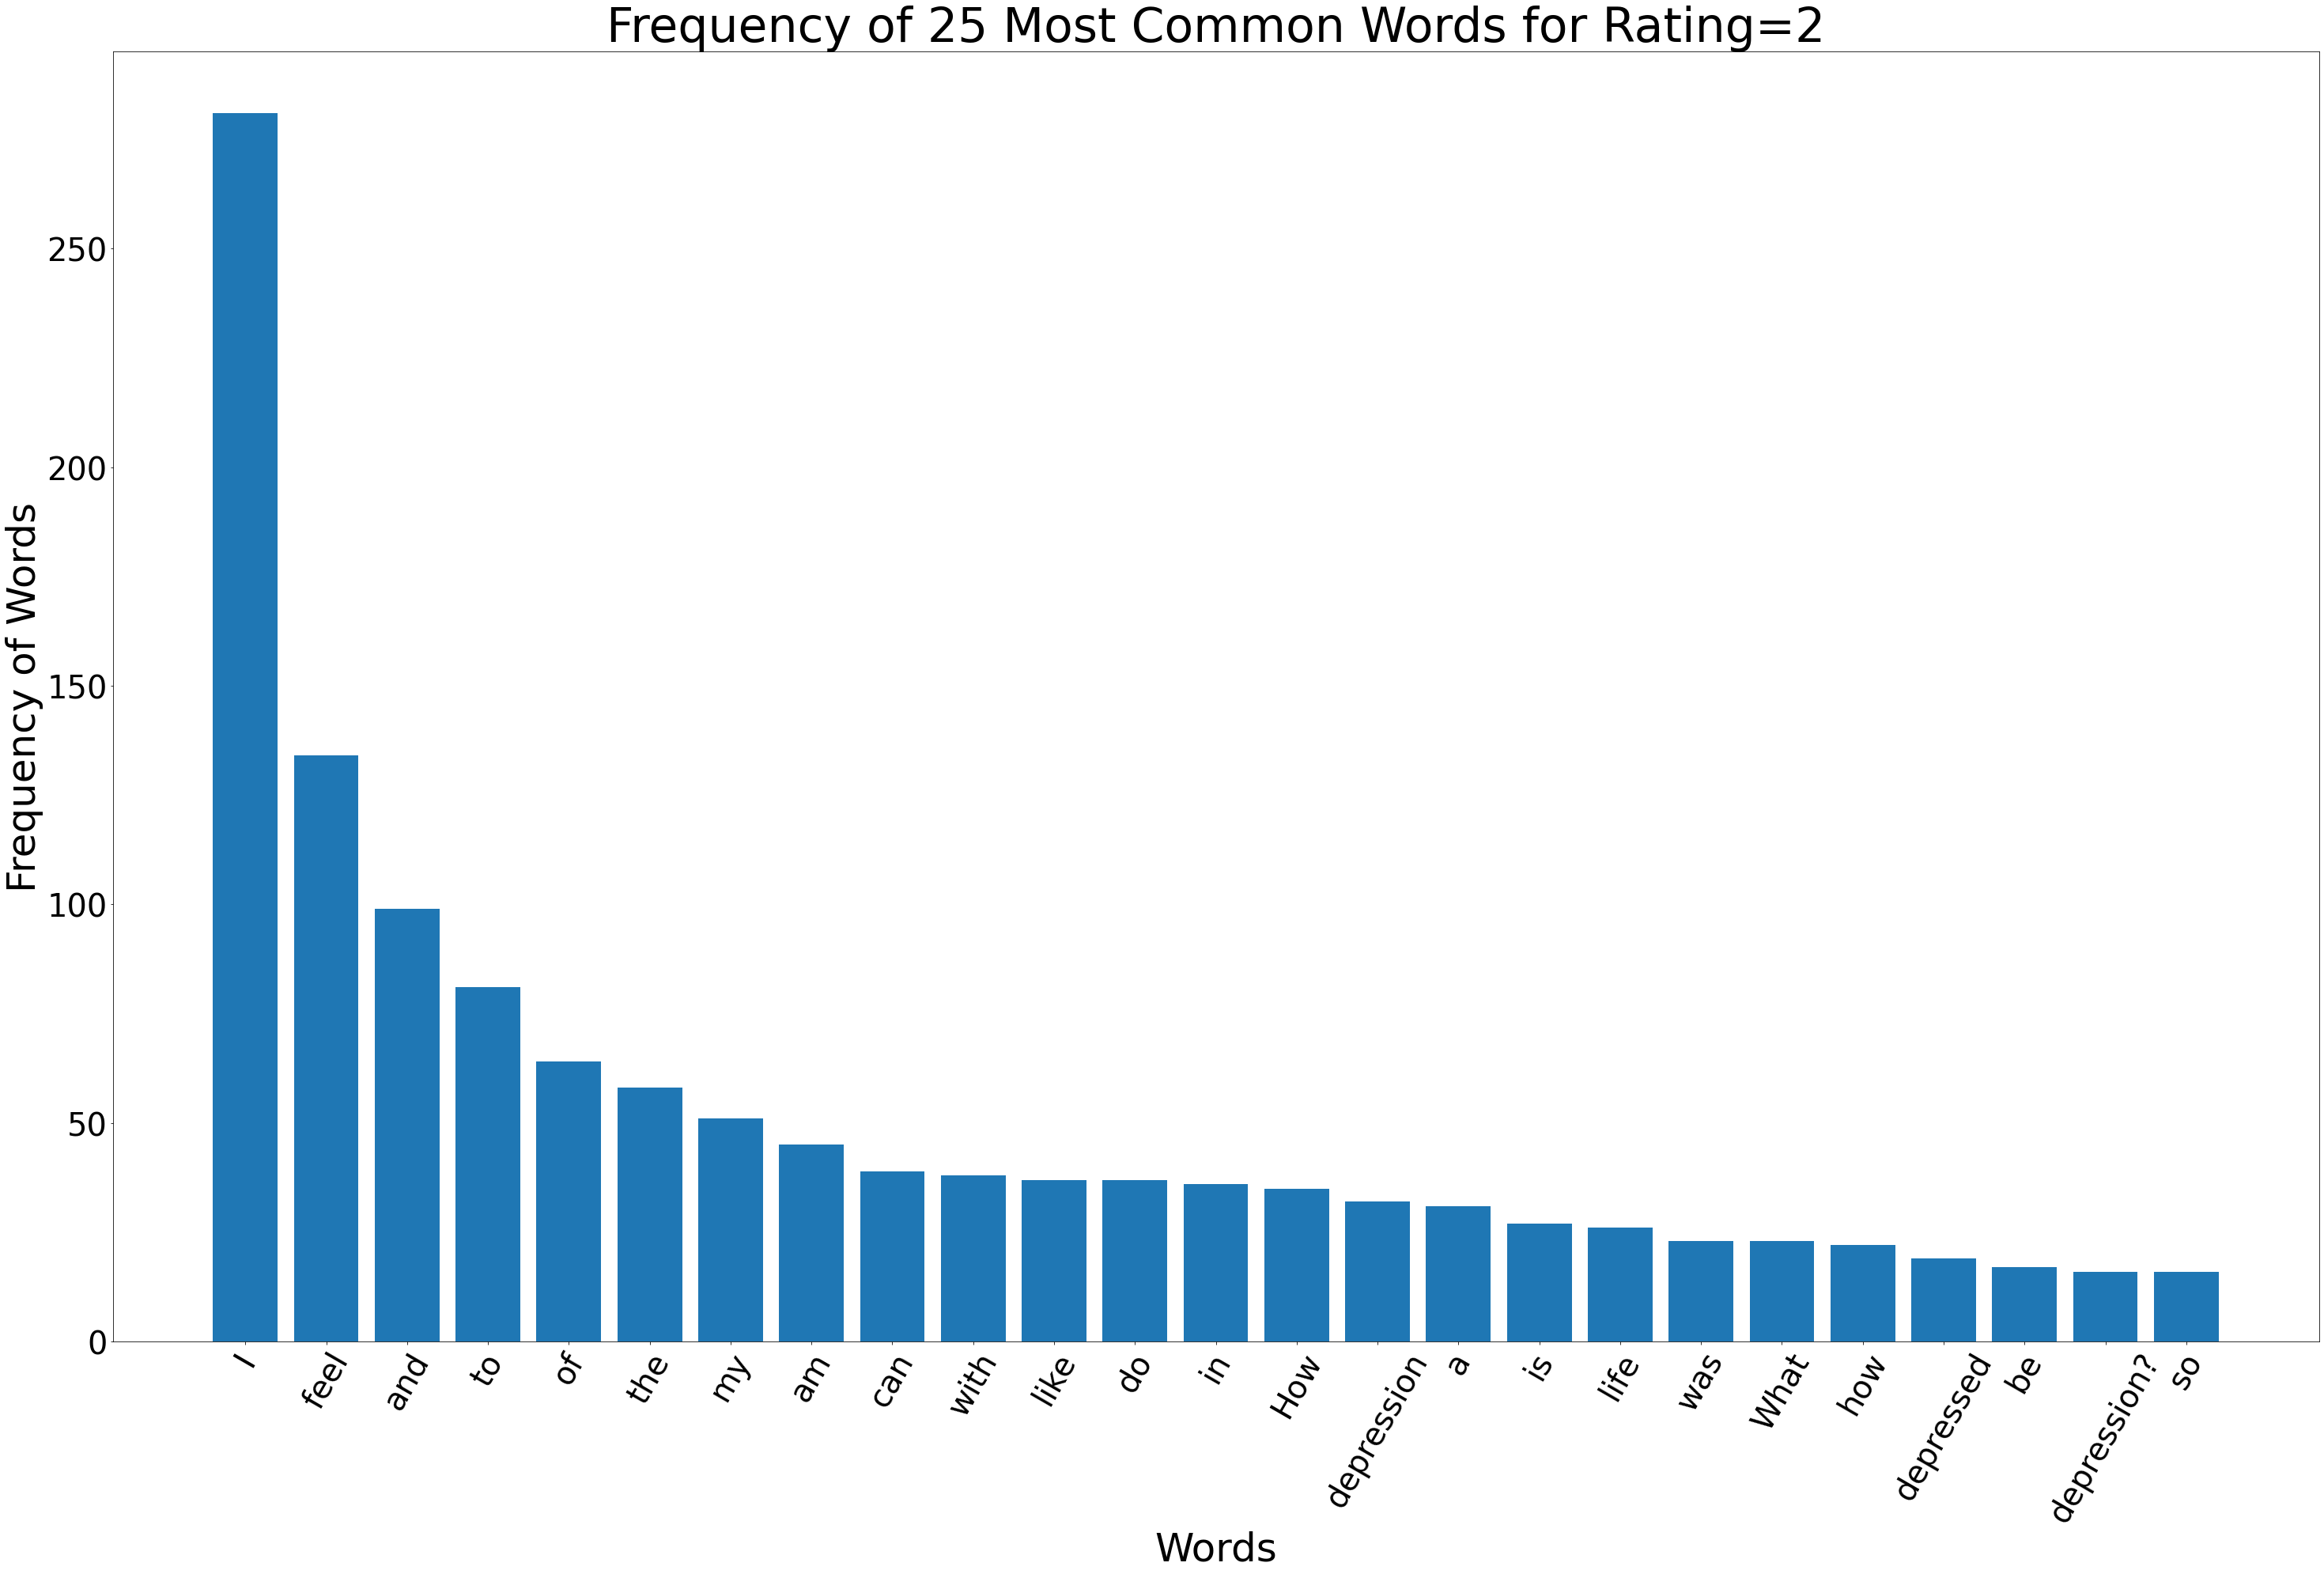

In [51]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=2', fontsize=60)
plt.show()

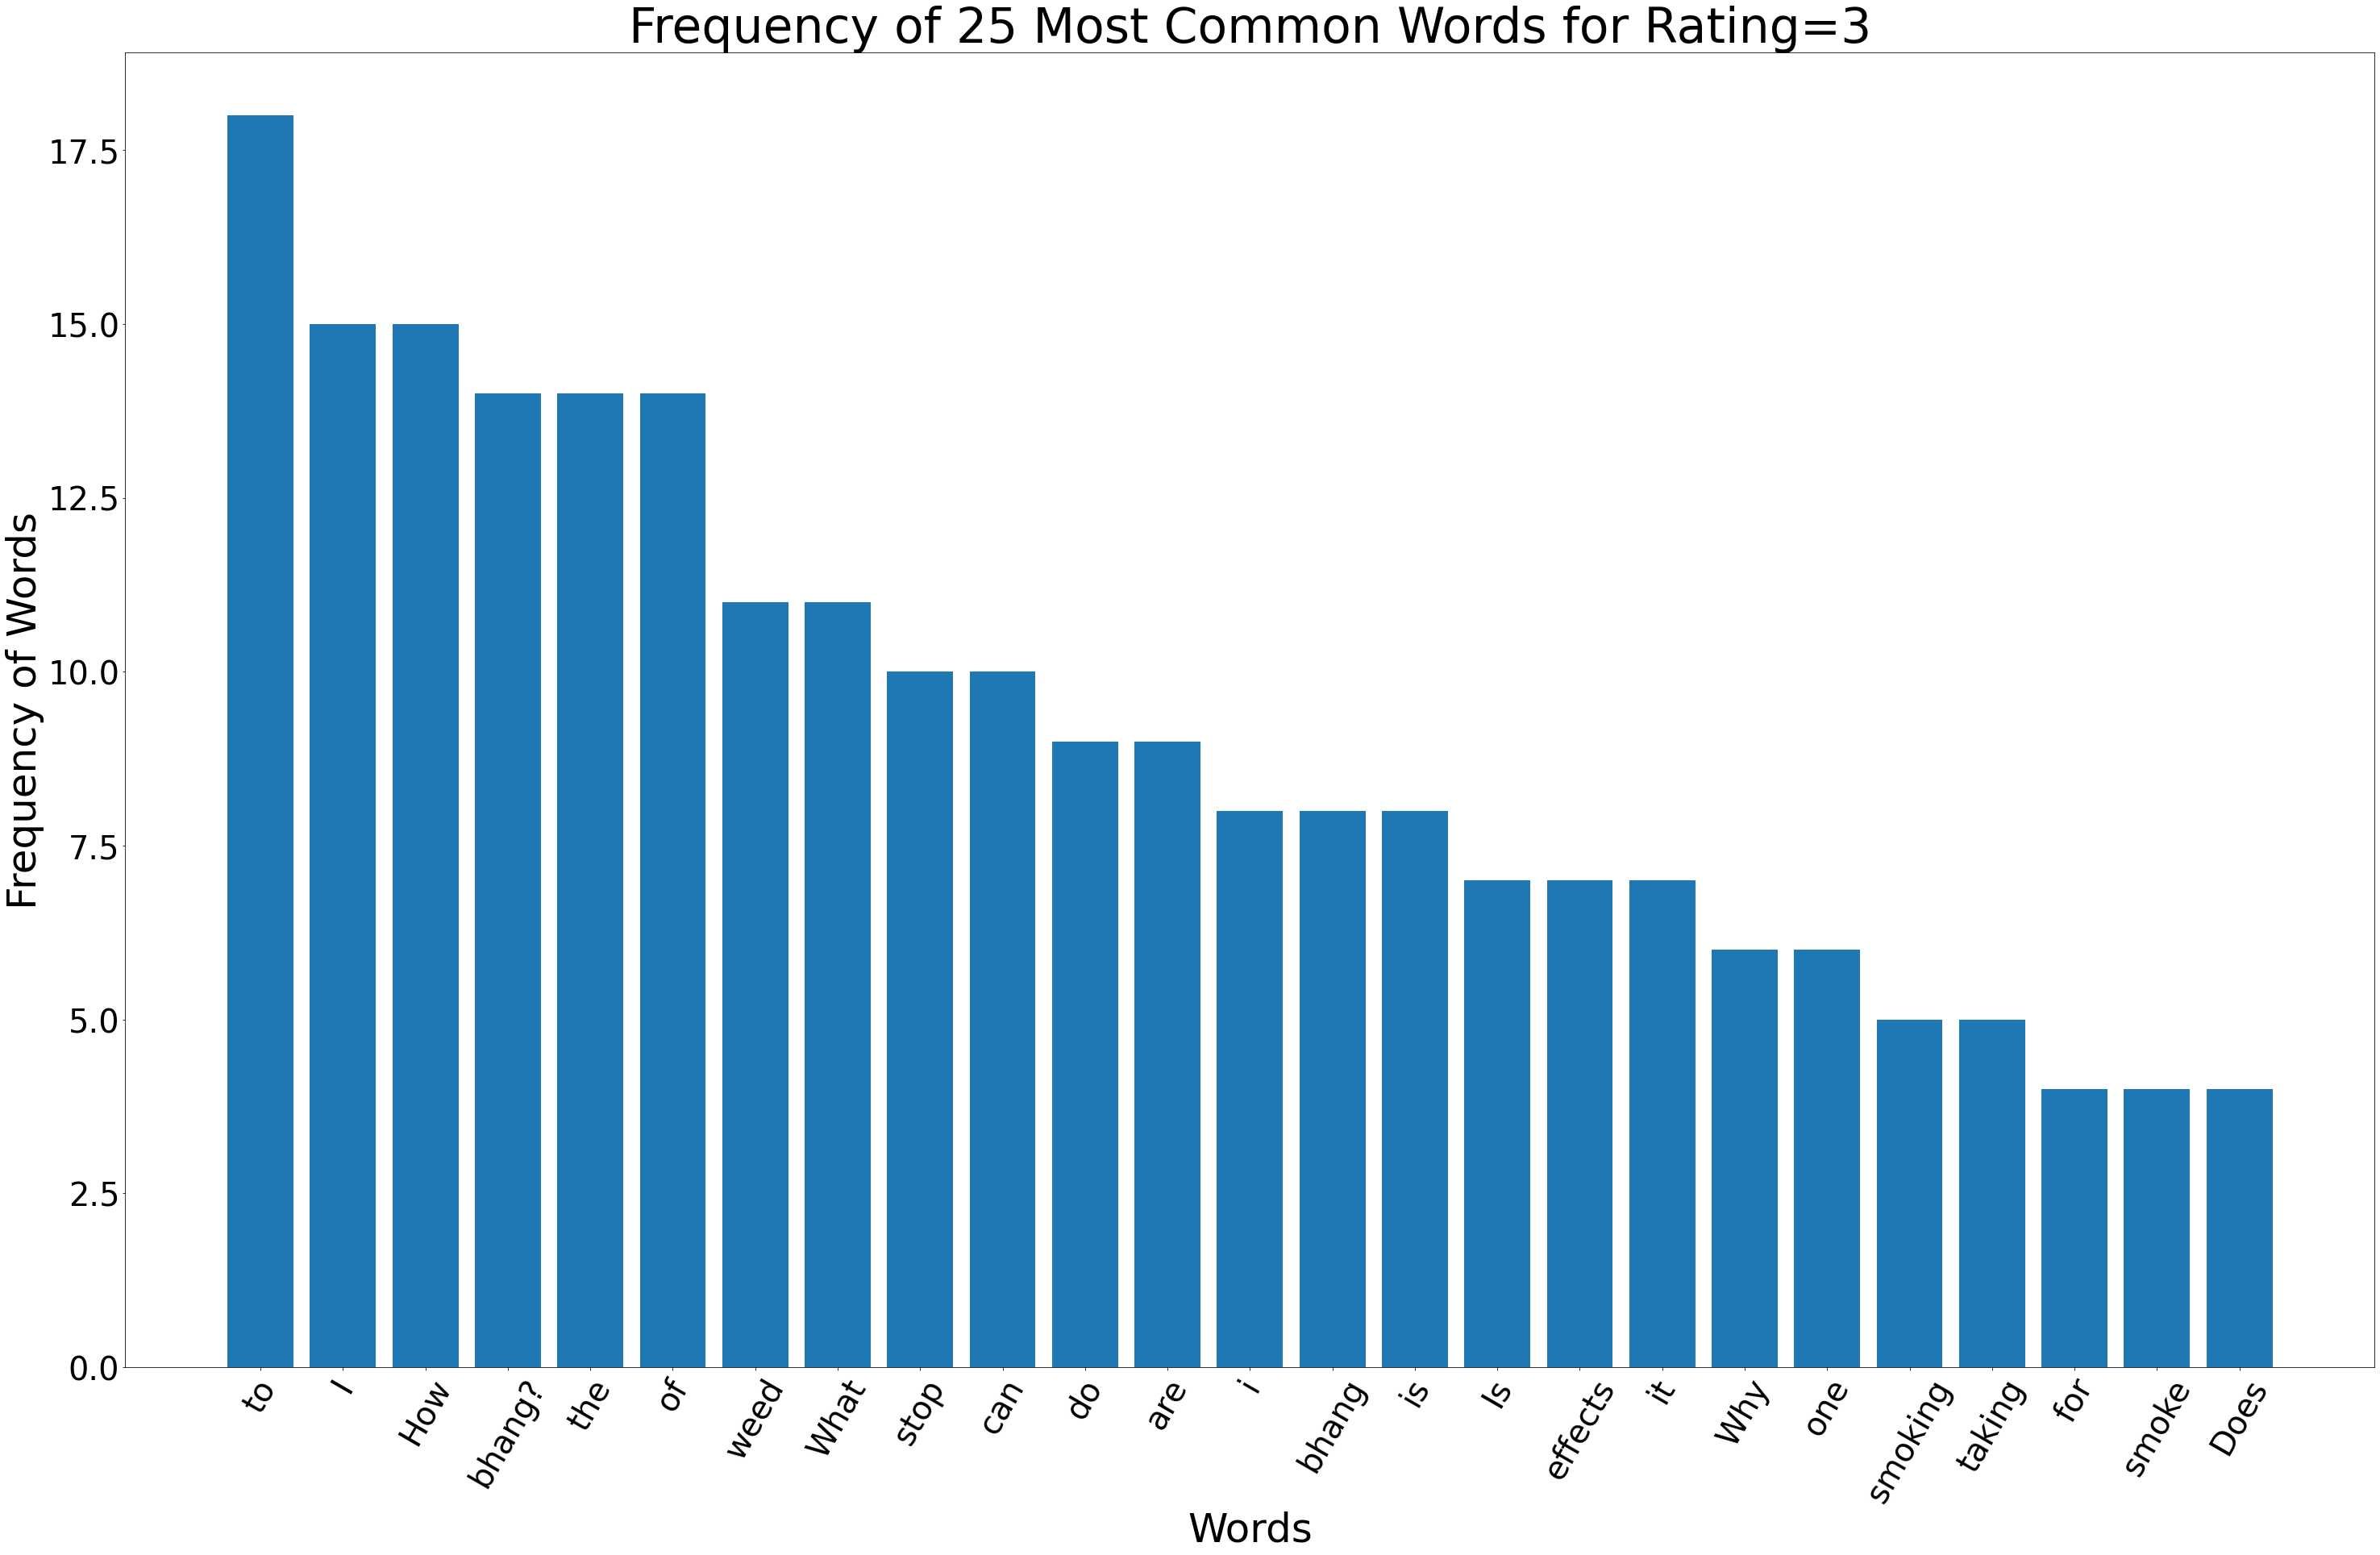

In [52]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words2, freq2)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=3', fontsize=60)
plt.show()

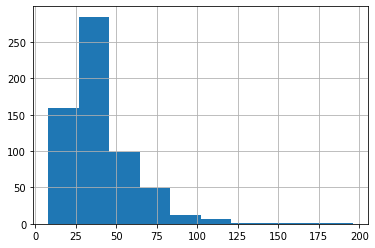

In [53]:
data['text'].str.len().hist()

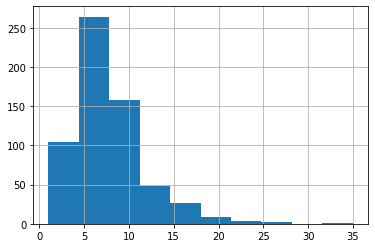

In [55]:
data['text'].str.split().\
    map(lambda x: len(x)).\
    hist()

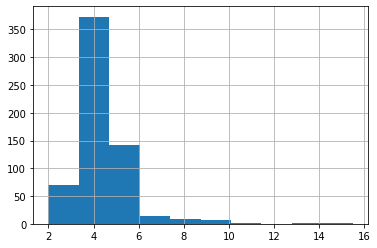

In [56]:
data['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [60]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pooja.singhal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
corpus=[]
new= data['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [62]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

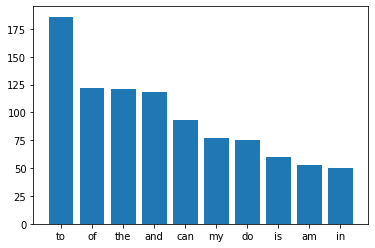

In [63]:
plot_top_stopwords_barchart(data['text'])

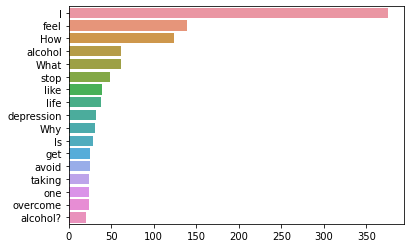

In [64]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [65]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

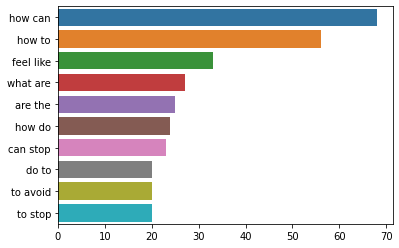

In [69]:
top_n_bigrams=get_top_ngram(data['text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

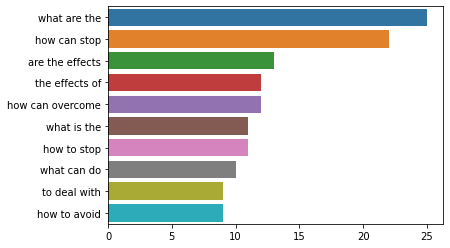

In [70]:
top_tri_grams=get_top_ngram(data['text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)